# BAB 1 - Introduction

Nama : Bagas Distyo Utomo
Batch : RMT-41 

Problem Statement : 
Meningkatkan kualitas segmentasi nasabah dengan mengelompokkan pengguna kartu kredit berdasarkan pola perilaku aktual dalam 6 bulan terakhir, untuk menghasilkan segmentasi yang lebih relevan dan dapat digunakan untuk menyusun strategi pemasaran yang lebih tepat sasaran di Bank ABC dalam jangka waktu enam bulan ke depan.

Objektif : 
Melakukan segmentasi nasabah kartu kredit menggunakan K-Means Clustering untuk mengelompokkan nasabah berdasarkan perilaku penggunaan. Proses menggunakan PCA untuk reduksi dimensi dengan mempertahankan 95% informasi, serta pemilihan jumlah klaster optimal menggunakan Elbow Method, Silhouette Score, dan visualisasi clustering. Hasil segmentasi akan digunakan untuk memberikan rekomendasi strategi bisnis yang lebih tepat sasaran.

# BAB 2 - Query SQL

Saya akan ambil data dari BigQuery

In [1]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "projectbagas"
client = bigquery.Client(project=project_id) #Menghubungkan big query

Authenticated


In [3]:
#Dataset_1
df = client.query('''
  SELECT *
  FROM `ftds-hacktiv8-project.phase1_ftds_041_rmt.credit-card-information`
  WHERE MOD(CUST_ID, 2) = 1
''').to_dataframe()

# Menyimpan dataframe ke dalam file CSV
df.to_csv('P1G6_Set_1_bagas_distyo.csv', index=False)

df.head(10)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3209     0.570113           0.090909      29.00             29.00   
1     4543    22.353780           0.181818     284.50            284.50   
2     5895     3.307286           0.181818      60.00             60.00   
3     6987   287.817221           1.000000     360.00            360.00   
4     7705     2.880247           0.181818     250.00            250.00   
5     7755   440.613643           1.000000     600.00            600.00   
6     8883  1439.410201           1.000000     184.70            184.70   
7      733   130.484418           0.454545    1428.97           1428.97   
8     5871   152.758442           0.727273     276.00             81.00   
9     8141  1298.539837           1.000000      42.56              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0             0.083333   
1                    0.00           0.0             0.083333   
2                    0.00           0.0             0.083333   
3                    0.00           0.0             0.083333   
4                    0.00           0.0             0.083333   
5                    0.00           0.0             0.125000   
6                    0.00           0.0             0.166667   
7                    0.00           0.0             0.250000   
8                  195.00           0.0             0.250000   
9                   42.56           0.0             0.250000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.083333                          0.000000   
1                    0.083333                          0.000000   
2                    0.083333                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.125000                          0.000000   
6                    0.166667                          0.000000   
7                    0.250000                          0.000000   
8                    0.083333                          0.083333   
9                    0.000000                          0.250000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1        2500.0   
1                     0.0                 0              2        1000.0   
2                     0.0                 0              1       11000.0   
3                     0.0                 0              1        3000.0   
4                     0.0                 0              1        2000.0   
5                     0.0                 0              1        1000.0   
6                     0.0                 0              2        1500.0   
7                     0.0                 0              3        7000.0   
8                     0.0                 0              3        1200.0   
9                     0.0                 0              3        1500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   319.172687               NaN          0.000000      12  
1  1578.650857         86.173877          0.000000      12  
2  1042.001588               NaN          0.000000      12  
3   112.678222        208.247475          0.000000      12  
4  1401.222628        159.142575          0.000000      12  
5   215.316424        137.846006          0.000000       8  
6   299.988581       4792.613550          0.000000      12  
7  1444.388031         77.509848          0.000000      12  
8  1316.604491        132.449236          0.142857      12  
9   278.050986        814.495329          0.000000      12

Dataset sudah berhasil disimpan, selanjutnya menampilkan data 10 terakhir

In [4]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1293  2893.897487           1.000000      18.00              0.00   
4466     8069   477.903003           1.000000     566.12            396.51   
4467     3009  1959.359450           1.000000       0.00              0.00   
4468     4877    51.422178           0.636364       0.00              0.00   
4469     8417  1488.113177           1.000000       0.00              0.00   
4470     3303  3467.619262           1.000000     468.49            278.50   
4471     4127   443.339878           1.000000       0.00              0.00   
4472       59  2847.472954           1.000000       0.00              0.00   
4473     7413  1184.529629           1.000000     467.32              0.00   
4474       85  6477.299600           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   18.00   3904.514452             0.083333   
4466                  169.61    493.409789             0.333333   
4467                    0.00   2757.579869             0.000000   
4468                    0.00   1504.179802             0.000000   
4469                    0.00   2599.489045             0.000000   
4470                  189.99   2493.180667             0.833333   
4471                    0.00    857.622301             0.000000   
4472                    0.00   3800.293424             0.000000   
4473                  467.32   2337.837011             1.000000   
4474                    0.00   2436.195048             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.000000                          0.083333   
4466                    0.250000                          0.250000   
4467                    0.000000                          0.000000   
4468                    0.000000                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.083333                          0.666667   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          1.000000   
4474                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.416667                23              1        6000.0   
4466                0.416667                 7             12        1500.0   
4467                0.500000                 6              0        4000.0   
4468                0.500000                16              0        5500.0   
4469                0.500000                15              0        2500.0   
4470                0.500000                10             10        4000.0   
4471                0.555556                 5              0        1200.0   
4472                0.583333                16              0        4000.0   
4473                0.583333                 7             25        6500.0   
4474                0.666667                 8              0       11500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   483.729934        720.971058          0.000000      12  
4466   457.330803        210.151115          0.000000      12  
4467  1542.366508        460.734661          0.000000      12  
4468  1444.167453         70.384975          0.363636      12  
4469  2952.279108        549.725344          0.000000      12  
4470  1612.002883        898.050967          0.000000      12  
4471   274.760566        157.320637          0.000000       9  
4472  4869.842863       1078.106633          0.083333      12  
4473   903.639776        340.000899          0.083333      12  
4474  2480.091913       1572.040565          0.000000      12

Data tersebut berisi 4,475 baris. Selanjutnya melakukan import libraries yang akan digunaka dalam project ini.

# BAB 3 - Import Libraries

Library yang akan digunakan pada project ini ditulis di bagian ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
import pickle

Selanjutnya akan melakukan data loading

# BAB 4 - Data Loading

Selanjutnya loading data yang sudah diambil sebelumnya

In [2]:
#dataset load
df_ori = pd.read_csv('P1G6_Set_1_bagas_distyo.csv')

#duplicat dataset
df = df_ori.copy() #Tujuan duplikat agar dataset asli tidak berubah ketika dibutuhkan suatu saat nanti
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3209     0.570113           0.090909      29.00              29.0   
1        4543    22.353780           0.181818     284.50             284.5   
2        5895     3.307286           0.181818      60.00              60.0   
3        6987   287.817221           1.000000     360.00             360.0   
4        7705     2.880247           0.181818     250.00             250.0   
...       ...          ...                ...        ...               ...   
4470     3303  3467.619262           1.000000     468.49             278.5   
4471     4127   443.339878           1.000000       0.00               0.0   
4472       59  2847.472954           1.000000       0.00               0.0   
4473     7413  1184.529629           1.000000     467.32               0.0   
4474       85  6477.299600           1.000000       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.083333   
1                       0.00      0.000000             0.083333   
2                       0.00      0.000000             0.083333   
3                       0.00      0.000000             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
4470                  189.99   2493.180667             0.833333   
4471                    0.00    857.622301             0.000000   
4472                    0.00   3800.293424             0.000000   
4473                  467.32   2337.837011             1.000000   
4474                    0.00   2436.195048             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.083333                          0.000000   
1                       0.083333                          0.000000   
2                       0.083333                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
4470                    0.083333                          0.666667   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          1.000000   
4474                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        2500.0   
1                   0.000000                 0              2        1000.0   
2                   0.000000                 0              1       11000.0   
3                   0.000000                 0              1        3000.0   
4                   0.000000                 0              1        2000.0   
...                      ...               ...            ...           ...   
4470                0.500000                10             10        4000.0   
4471                0.555556                 5              0        1200.0   
4472                0.583333                16              0        4000.0   
4473                0.583333                 7             25        6500.0   
4474                0.666667                 8              0       11500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      319.172687               NaN          0.000000      12  
1     1578.650857         86.173877          0.000000      12  
2     1042.001588               NaN          0.000000      12  
3      112.678222        208.247475          0.000000      12  
4     1401.222628        159.142575          0.000000      12  
...           ...               ...               ...     ...  
4470  1612.002883        8

Data sudah berhasil di load, selanjutnya eksplorasi data sederhana

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Data berisi 18 kolom dan 4.475 baris. Terdapat missing value pada kolom MINIMUM_PAYMENTS

In [4]:
df['MINIMUM_PAYMENTS'].isnull().sum() #Menghitung null pada kolom minimum payments

155

Terdapat 155 missing value pada minimum payments dan akan dihandle pada bab feature engineering.

In [5]:
#Menghitung data duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat, selanjutnya melakukan EDA

# BAB 5 - Exploratory Data Analysis (EDA)

Bagian EDA ini saya akan menjawab beberapa pertanyaan :
- Pola antara TENURE dengan PURCHASES, BALANCE, dan PAYMENTS
- Pengaruh CREDIT_LIMIT terhadap PURCHASES_FREQUENCY

## 1. Hubungan TENURE dengan PURCHASES, BALANCE, dan PAYMENTS

Saya akan memeriksa distribusi datanya terlebih dahulu

In [6]:
df['PURCHASES'].skew()

7.0717057183311764

In [7]:
df['BALANCE'].skew()

2.3290088807150915

In [8]:
df['PAYMENTS'].skew()

5.747503259811284

Ketiga variabel tersebut memiliki distribusi yang tidak normal, selanjutnya melihat nilai korelasinya terhadap tenure dengan spearman

In [9]:
# Korelasi Spearman karena data skew
correlation_spearman = df[['TENURE', 'PURCHASES', 'BALANCE', 'PAYMENTS']].corr(method='spearman')
print(correlation_spearman['TENURE'].drop('TENURE'))

PURCHASES    0.126401
BALANCE      0.061795
PAYMENTS     0.198596
Name: TENURE, dtype: float64


Berdasarkan hasil korelasi spearman, terlihat bahwa hubungan antara tenure dengan purchases (0.13), balance (0.06), dan payments (0.20) tergolong lemah, namun semuanya menunjukkan arah positif. Artinya, semakin lama nasabah menggunakan kartu kredit, ada kecenderungan mereka sedikit lebih aktif dalam melakukan pembelian dan pembayaran, meskipun pengaruhnya tidak terlalu signifikan. Selanjutnya melakukan visualisasi rata rata purchase, balance, dan payments berdasarkan tenure.

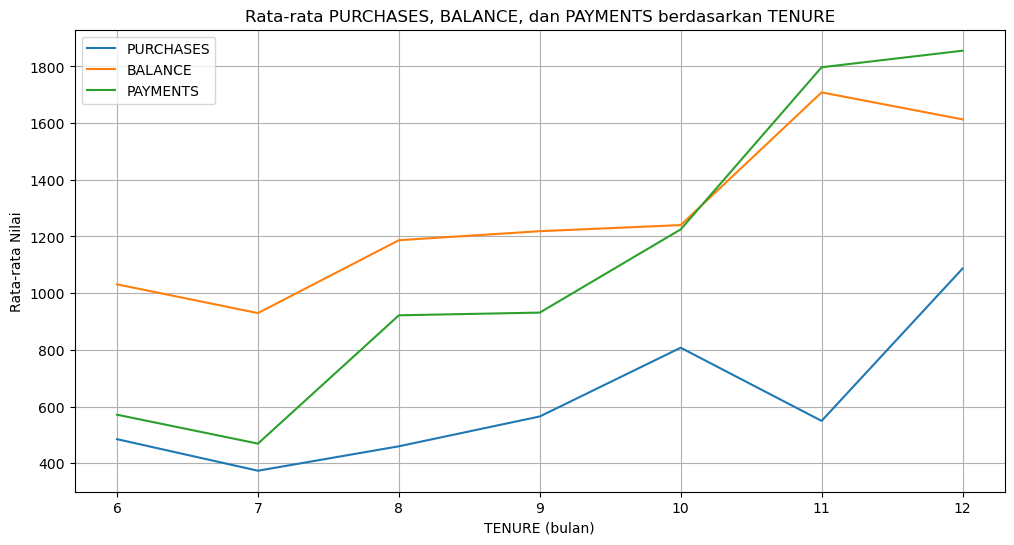

In [10]:
# Hitung rata-rata untuk masing-masing TENURE
tenure_grouped = df.groupby('TENURE')[['PURCHASES', 'BALANCE', 'PAYMENTS']].mean().reset_index()

# Membuat line plot pada variabel purchases, balance, dan payments terhadap tenure
plt.figure(figsize=(12,6))
sns.lineplot(data=tenure_grouped, x='TENURE', y='PURCHASES', label='PURCHASES')
sns.lineplot(data=tenure_grouped, x='TENURE', y='BALANCE', label='BALANCE')
sns.lineplot(data=tenure_grouped, x='TENURE', y='PAYMENTS', label='PAYMENTS')
plt.title('Rata-rata PURCHASES, BALANCE, dan PAYMENTS berdasarkan TENURE')
plt.xlabel('TENURE (bulan)')
plt.ylabel('Rata-rata Nilai')
plt.legend()
plt.grid(True)
plt.show()


- Berdasarkan visualisasi tersebut, terlihat bahwa terdapat tren peningkatan pada nilai rata-rata purchases, balance, dan payment seiring bertambahnya tenure. Pada tenure 10 hingga 12 bulan, ketiga variabel mengalami lonjakan signifikan, yang menunjukkan bahwa nasabah dengan masa penggunaan kartu lebih lama cenderung lebih aktif bertransaksi, menyimpan saldo lebih besar, dan membayar lebih banyak.
- Bank dapat memanfaatkan pola ini dengan mengembangkan program loyalitas khusus bagi nasabah dengan masa penggunaan di atas 10 bulan dan aktivitas transaksi yang tinggi. Strategi ini bisa berupa sistem keanggotaan bertingkat (tiered membership), atau peningkatan limit kredit secara otomatis untuk meningkatkan loyalitas

## 2.Pengaruh CREDIT_LIMIT terhadap PURCHASES_FREQUENCY

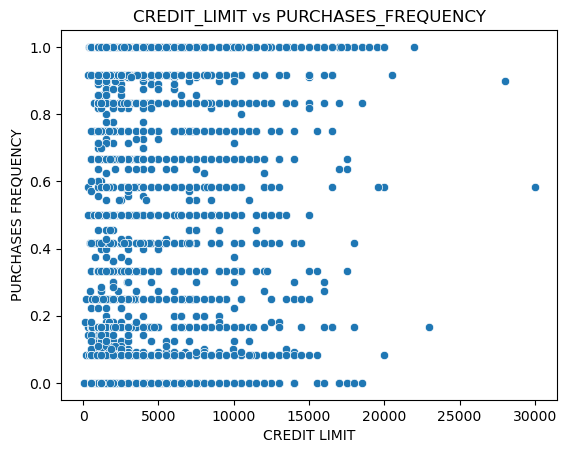

CREDIT_LIMIT  PURCHASES_FREQUENCY
CREDIT_LIMIT             1.000000             0.106659
PURCHASES_FREQUENCY      0.106659             1.000000

In [11]:
#Membuat scatterplot antara credit limit dan purchase_frequency
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', data=df)
plt.title('CREDIT_LIMIT vs PURCHASES_FREQUENCY')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES FREQUENCY')
plt.show()

# Korelasi numerik
df[['CREDIT_LIMIT', 'PURCHASES_FREQUENCY']].corr()


- Berdasarkan gambar tersebut, credit limit dan purchase frequency tidak memiliki hubungan yang linear. Dapat dilihat jika credit limit sedikit maka purchase frequencynya bisa sedikit dan bisa banyak. Lalu berdasarkan korelasi juga hasilnya 0.106659 yang menunjukan bahwa hubungan antara credit limit dan purchase frequency sangat lemah. Artinya, meskipun sebagian nasabah memiliki limit kartu kredit yang tinggi, hal tersebut tidak secara signifikan mendorong mereka untuk bertransaksi lebih sering. Banyak nasabah dengan credit limit rendah justru tetap melakukan pembelian dengan frekuensi tinggi, dan banyak juga melakukan pembelian dengan frekuensi rendah.
- Rekomendasi bisnis : Bank sebaiknya menerapkan pendekatan berbasis perilaku dan segmentasi nasabah. Misalnya, memberikan insentif berupa poin reward atau cashback kepada nasabah aktif dengan frekuensi pembelian tinggi untuk meningkatkan loyalitas. Sementara itu, untuk nasabah dengan limit tinggi namun tidak aktif, bisa diberikan promosi eksklusif untuk mengaktivasi penggunaan kartu mereka.

Setelah EDA, selanjutnya saya akan melakukan feature engineering

# BAB 6 - Feature Engineering

Saya akan melihat distribusi datanya terlebih dahulu setelah itu handle missing value dan handle outlier. Sebelum itu saya akan menghapus customer id karena data tersebut merupakan data id dari customer yang tidak dibutuhkan.

In [12]:
dataset = df.drop('CUST_ID', axis=1)
dataset

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0.570113           0.090909      29.00              29.0   
1       22.353780           0.181818     284.50             284.5   
2        3.307286           0.181818      60.00              60.0   
3      287.817221           1.000000     360.00             360.0   
4        2.880247           0.181818     250.00             250.0   
...           ...                ...        ...               ...   
4470  3467.619262           1.000000     468.49             278.5   
4471   443.339878           1.000000       0.00               0.0   
4472  2847.472954           1.000000       0.00               0.0   
4473  1184.529629           1.000000     467.32               0.0   
4474  6477.299600           1.000000       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.083333   
1                       0.00      0.000000             0.083333   
2                       0.00      0.000000             0.083333   
3                       0.00      0.000000             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
4470                  189.99   2493.180667             0.833333   
4471                    0.00    857.622301             0.000000   
4472                    0.00   3800.293424             0.000000   
4473                  467.32   2337.837011             1.000000   
4474                    0.00   2436.195048             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.083333                          0.000000   
1                       0.083333                          0.000000   
2                       0.083333                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
4470                    0.083333                          0.666667   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          1.000000   
4474                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        2500.0   
1                   0.000000                 0              2        1000.0   
2                   0.000000                 0              1       11000.0   
3                   0.000000                 0              1        3000.0   
4                   0.000000                 0              1        2000.0   
...                      ...               ...            ...           ...   
4470                0.500000                10             10        4000.0   
4471                0.555556                 5              0        1200.0   
4472                0.583333                16              0        4000.0   
4473                0.583333                 7             25        6500.0   
4474                0.666667                 8              0       11500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      319.172687               NaN          0.000000      12  
1     1578.650857         86.173877          0.000000      12  
2     1042.001588               NaN          0.000000      12  
3      112.678222        208.247475          0.000000      12  
4     1401.222628        159.142575          0.000000      12  
...           ...               ...               ...     ...  
4470  1612.002883        898.050967          0.000000      12  
4471   274.760566        157.320637          0.000000       9  
4472  4869

## Cek Distribusi

In [13]:
dataset.skew().sort_values() #Melihat skewness

TENURE                              -2.954159
BALANCE_FREQUENCY                   -2.026530
PURCHASES_FREQUENCY                  0.058755
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CREDIT_LIMIT                         1.498948
ONEOFF_PURCHASES_FREQUENCY           1.548319
CASH_ADVANCE_FREQUENCY               1.834211
PRC_FULL_PAYMENT                     1.975238
BALANCE                              2.329009
PURCHASES_TRX                        4.747507
CASH_ADVANCE                         5.638109
PAYMENTS                             5.747503
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE_TRX                     6.420104
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
MINIMUM_PAYMENTS                    14.669771
dtype: float64

Berdasarkan hasil tersebut, kolom yang mendekati normal adalah purchases frequency karena skewnya di antara -0.5 dan 0.5 dan sisanya adalah distribusi tidak normal. Selanjutnya menghandle missing value

## Handle Missing Value

In [14]:
dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
dataset.isnull().mean()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034637
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Kolom MINIMUM_PAYMENTS memiliki 155 missing value dan sekitar 3.46%. Maksud dari kolom MINIMUM_PAYMENTS disini adalah Jumlah minimum yang dibayarkan oleh pengguna kartu kredit terhadap tagihan mereka dalam suatu periode.

Selanjutnya saya ingin mengetahui tipe missingnya

In [16]:
# Korelasi Spearman antara MINIMUM_PAYMENTS dengan variabel lain
columns_to_check = ['CREDIT_LIMIT', 'BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS'] #untuk contohnya saya menggunakan credit_limit, balance, dan purchases
correlation_spearman = dataset[columns_to_check].corr(method='spearman')

# Tampilkan korelasi terhadap MINIMUM_PAYMENTS
print("Korelasi Spearman terhadap MINIMUM_PAYMENTS:\n")
print(correlation_spearman['MINIMUM_PAYMENTS'].drop('MINIMUM_PAYMENTS'))

Korelasi Spearman terhadap MINIMUM_PAYMENTS:

CREDIT_LIMIT    0.255133
BALANCE         0.903427
PURCHASES      -0.005497
Name: MINIMUM_PAYMENTS, dtype: float64


Missing value pada kolom minimum_payments termasuk kategori missing at random (mar) karena hilangnya data dipengaruhi oleh variabel lain yang terobservasi, terutama balance, yang memiliki korelasi sangat kuat sebesar 0.903. artinya, nasabah dengan saldo rendah atau nol cenderung tidak memiliki catatan pembayaran minimum, bukan karena karakteristik minimum_payments itu sendiri, melainkan karena kondisi finansial mereka yang terlihat dari saldo dan credit limit.

Karena kolom minimum_payments tidak terdistribusi normal, metode imputasi yang paling cocok adalah menggunakan median. Median lebih tepat daripada rata-rata (mean) untuk data yang tidak terdistribusi merata, karena median tidak terpengaruh oleh nilai yang sangat tinggi atau rendah. Dengan menggunakan median, saya bisa mengisi nilai yang hilang tanpa harus menghapus data, sehingga jumlah data tetap terjaga.

In [17]:
# Mengisi missing values pada kolom MINIMUM_PAYMENTS dengan median
median_value = dataset['MINIMUM_PAYMENTS'].median()
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(median_value)

# Cek apakah masih ada missing values
print(dataset['MINIMUM_PAYMENTS'].isnull().sum())

0


Setelah handle missing value, selanjutnya handle outlier

## Handle Outlier

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

In [19]:
dataset['TENURE'].value_counts()

TENURE
12    3777
11     199
10     122
6      101
8       99
7       90
9       87
Name: count, dtype: int64

Kolom TENURE tidak perlu dihandle outlier karena nilainya terbatas dalam rentang kecil (6 hingga 12) dan tidak terdapat nilai yang ekstrem atau mencurigakan seperti 100 misalnya.

In [20]:
# Kolom distribusi normal
normal = ['PURCHASES_FREQUENCY']

# Kolom-kolom dengan distribusi yang tidak normal berdasarkan skewness tinggi
not_normal = ['BALANCE', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
              'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
              'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
              'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT']

# Mencari boundari untuk distribusi normal
def find_normal_boundaries(dataset, variable):
    upper_boundary = dataset[variable].mean() + 3 * dataset[variable].std()
    lower_boundary = dataset[variable].mean() - 3 * dataset[variable].std()
    return upper_boundary, lower_boundary

# Melihat boundary untuk distribusi skew
def find_skewed_boundaries(dataset, variable, distance=3):
    IQR = dataset[variable].quantile(0.75) - dataset[variable].quantile(0.25)
    lower_boundary = dataset[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = dataset[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

# Looping untuk mengecek outliers pada semua kolom yang terdistribusi normal
for column in normal:
    upper_boundary, lower_boundary = find_normal_boundaries(dataset, column)
    
    # Menampilkan informasi terkait outliers untuk distribusi normal
    print(f'Outliers for {column} (Normal Distribution):')
    print(f'Total data: {len(dataset)}')
    print(f'Outliers greater than upper boundary ({upper_boundary}): {len(dataset[dataset[column] > upper_boundary])}')
    print(f'Outliers smaller than lower boundary ({lower_boundary}): {len(dataset[dataset[column] < lower_boundary])}')
    print(f'Percentage of outliers greater than upper boundary: {len(dataset[dataset[column] > upper_boundary])/len(dataset) * 100:.2f}%')
    print(f'Percentage of outliers smaller than lower boundary: {len(dataset[dataset[column] < lower_boundary])/len(dataset) * 100:.2f}%')
    print('')  # New line for readability

# Looping untuk mengecek outliers pada semua kolom yang tidak terdistribusi normal
for column in not_normal:
    upper_boundary, lower_boundary = find_skewed_boundaries(dataset, column, 3)
    
    # Menampilkan informasi terkait outliers untuk distribusi skew
    print(f'Outliers for {column} (Skewed Distribution):')
    print(f'Total data: {len(dataset)}')
    print(f'Outliers greater than upper boundary ({upper_boundary}): {len(dataset[dataset[column] > upper_boundary])}')
    print(f'Outliers smaller than lower boundary ({lower_boundary}): {len(dataset[dataset[column] < lower_boundary])}')
    print(f'Percentage of outliers greater than upper boundary: {len(dataset[dataset[column] > upper_boundary])/len(dataset) * 100:.2f}%')
    print(f'Percentage of outliers smaller than lower boundary: {len(dataset[dataset[column] < lower_boundary])/len(dataset) * 100:.2f}%')
    print('')  # New line for readability


Outliers for PURCHASES_FREQUENCY (Normal Distribution):
Total data: 4475
Outliers greater than upper boundary (1.6992993795852276): 0
Outliers smaller than lower boundary (-0.7181412320991941): 0
Percentage of outliers greater than upper boundary: 0.00%
Percentage of outliers smaller than lower boundary: 0.00%

Outliers for BALANCE (Skewed Distribution):
Total data: 4475
Outliers greater than upper boundary (7816.984649): 93
Outliers smaller than lower boundary (-5644.981001): 0
Percentage of outliers greater than upper boundary: 2.08%
Percentage of outliers smaller than lower boundary: 0.00%

Outliers for INSTALLMENTS_PURCHASES (Skewed Distribution):
Total data: 4475
Outliers greater than upper boundary (1823.54): 216
Outliers smaller than lower boundary (-1367.655): 0
Percentage of outliers greater than upper boundary: 4.83%
Percentage of outliers smaller than lower boundary: 0.00%

Outliers for CASH_ADVANCE (Skewed Distribution):
Total data: 4475
Outliers greater than upper boundary

Dari hasil tersebut, menunjukan bahwa :
- Kolom PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY tidak memiliki outlier.
- Untuk kolom lainnya memiliki beberapa outlier dan Outlier akan ditangani dengan metode capping agar tetap mempertahankan seluruh data nasabah. Metode capping dilakukan menggunakan batas IQR karena data yang outlier itu skew semua. Penanganan ini dilakukan untuk menjaga kualitas analisis tanpa membuang informasi penting yang mungkin relevan secara bisnis, terutama dalam konteks perilaku penggunaan kartu kredit yang memang bisa sangat bervariasi antar nasabah.

In [21]:
# Kolom yang menggunakan IQR (tanpa TENURE)
outlier_column = [
    'BALANCE', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 
    'PAYMENTS', 'MINIMUM_PAYMENTS', 'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT'
] 

# Capping menggunakan IQR untuk kolom yang lebih skewed
winsoriser_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=outlier_column)

# Terapkan capping pada dataset
dataset_capped = winsoriser_skew.fit_transform(dataset)


In [22]:
#Fungsi ini digunakan untuk menampilkan grafik histogram dan boxplot.
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BALANCE - Before Capping


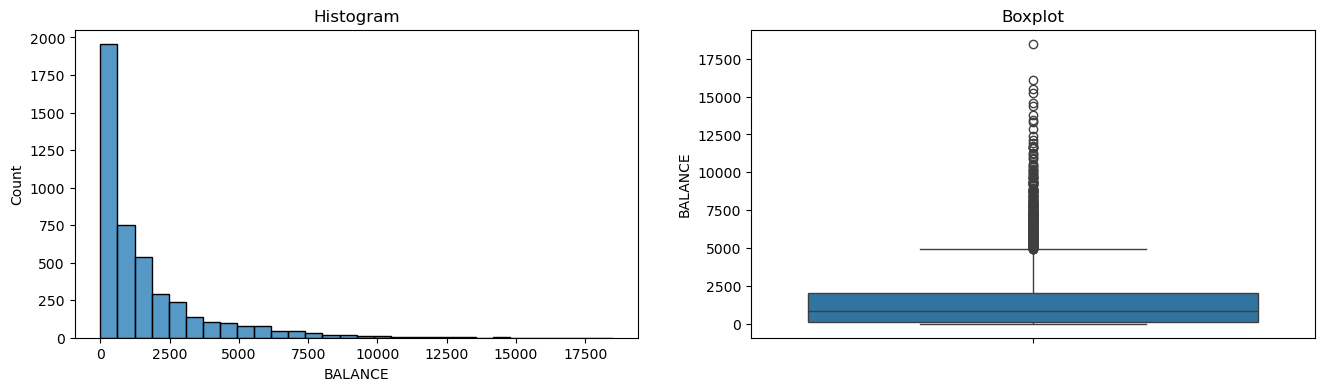


BALANCE - After Capping


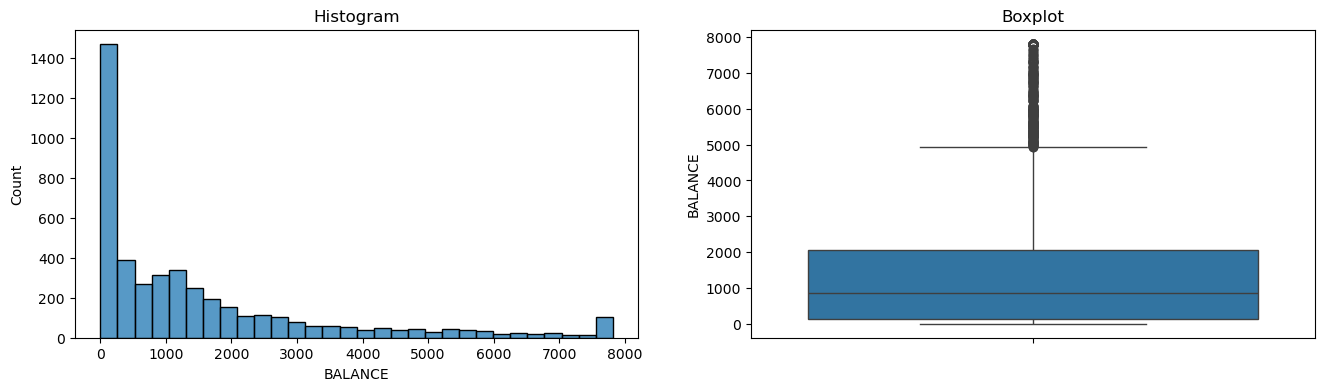

INSTALLMENTS_PURCHASES - Before Capping


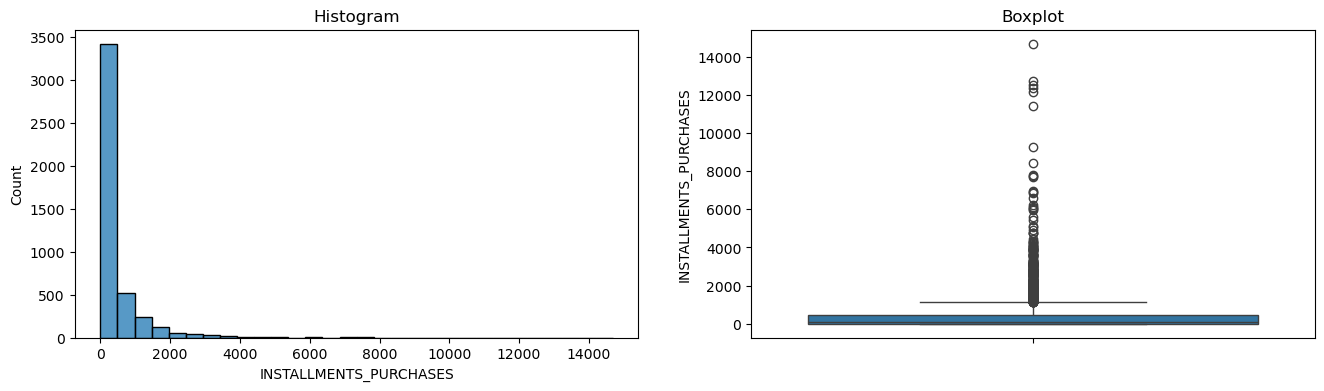


INSTALLMENTS_PURCHASES - After Capping


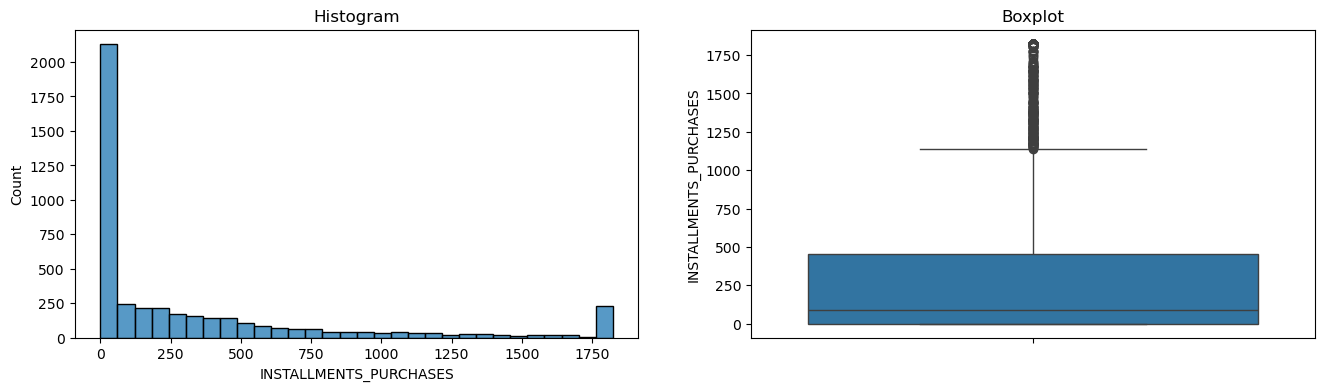

CASH_ADVANCE - Before Capping


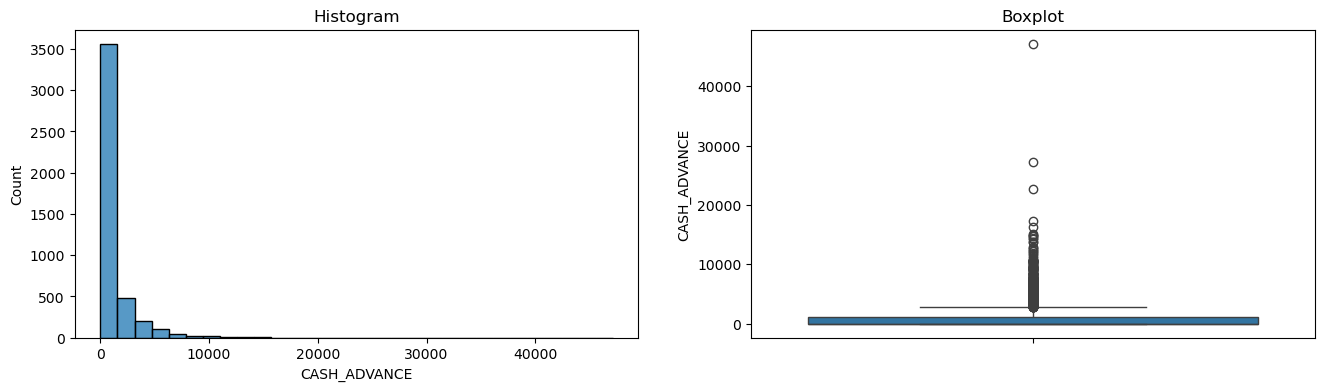


CASH_ADVANCE - After Capping


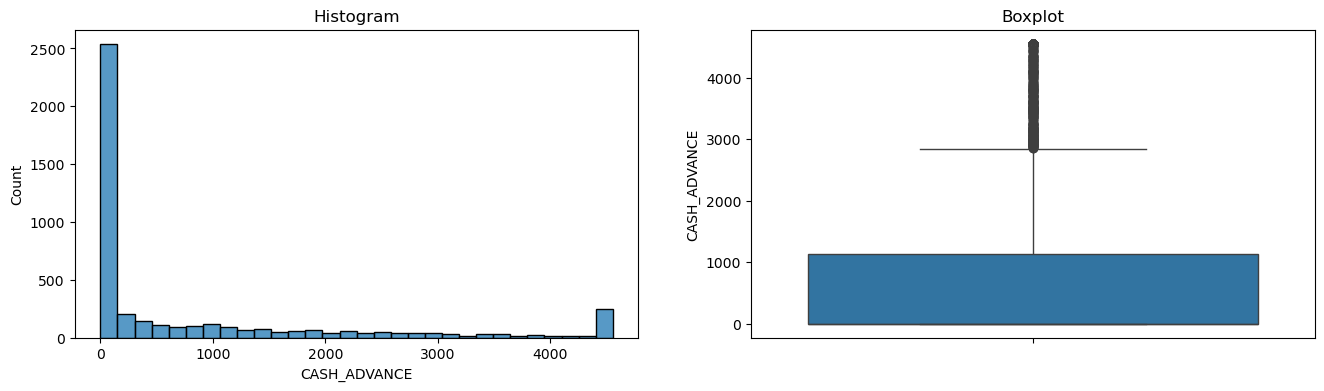

PURCHASES - Before Capping


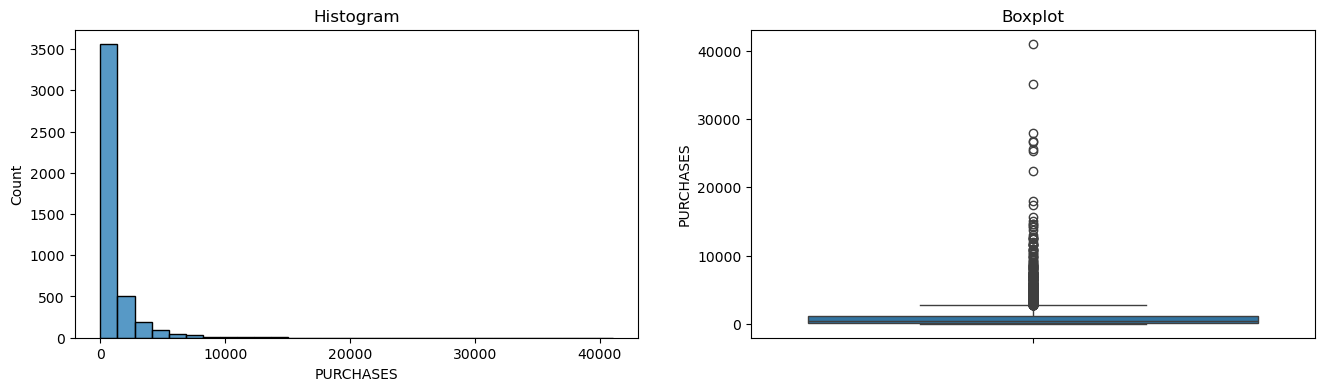


PURCHASES - After Capping


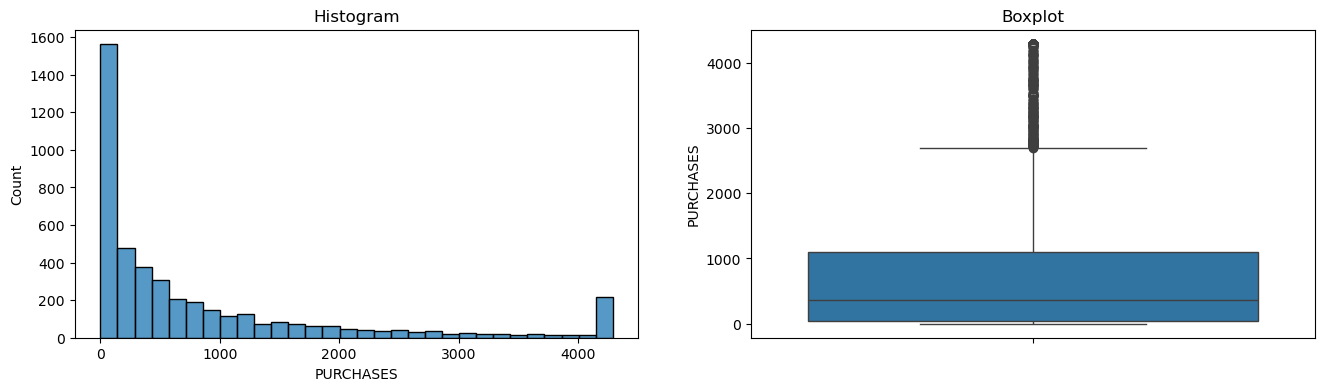

ONEOFF_PURCHASES - Before Capping


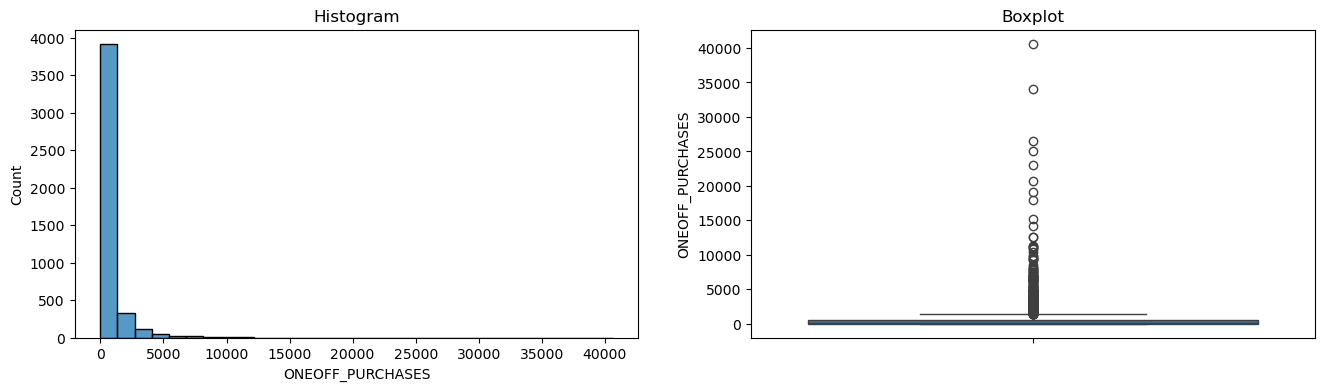


ONEOFF_PURCHASES - After Capping


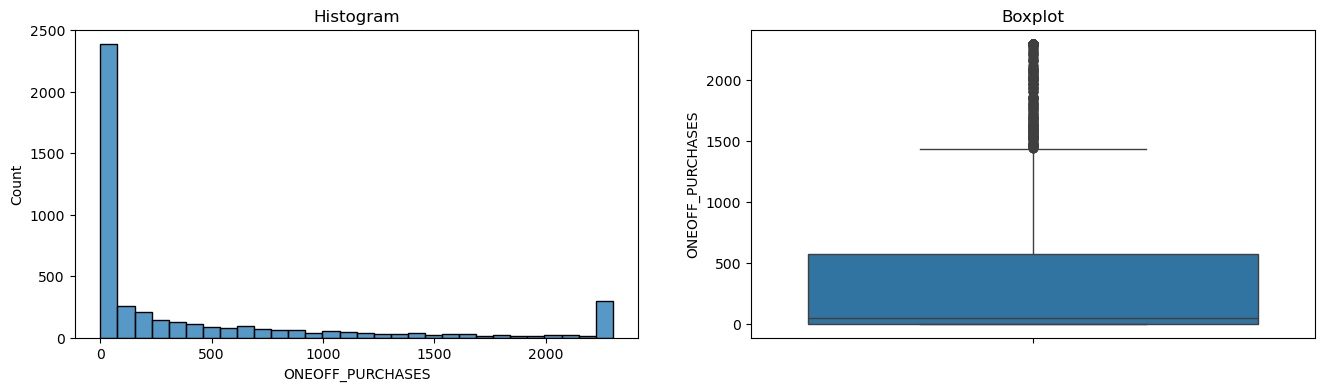

CASH_ADVANCE_FREQUENCY - Before Capping


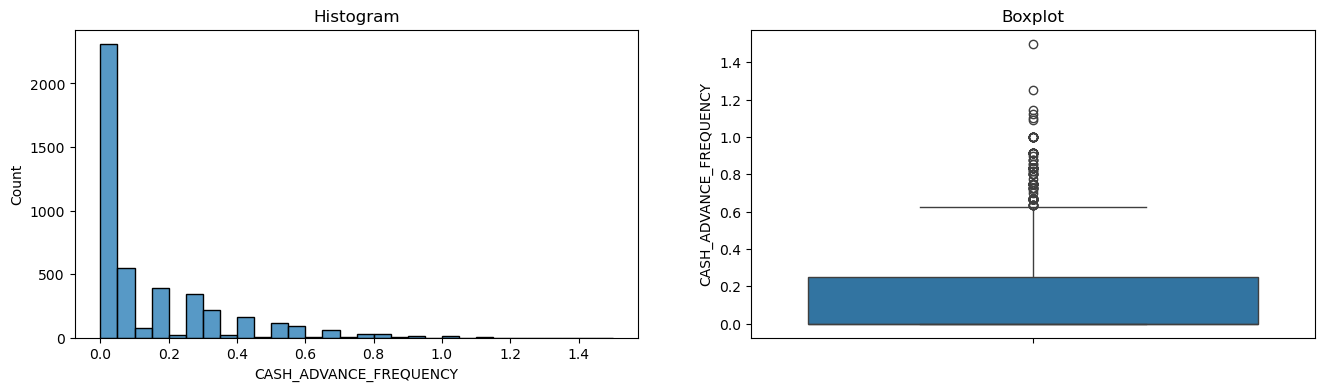


CASH_ADVANCE_FREQUENCY - After Capping


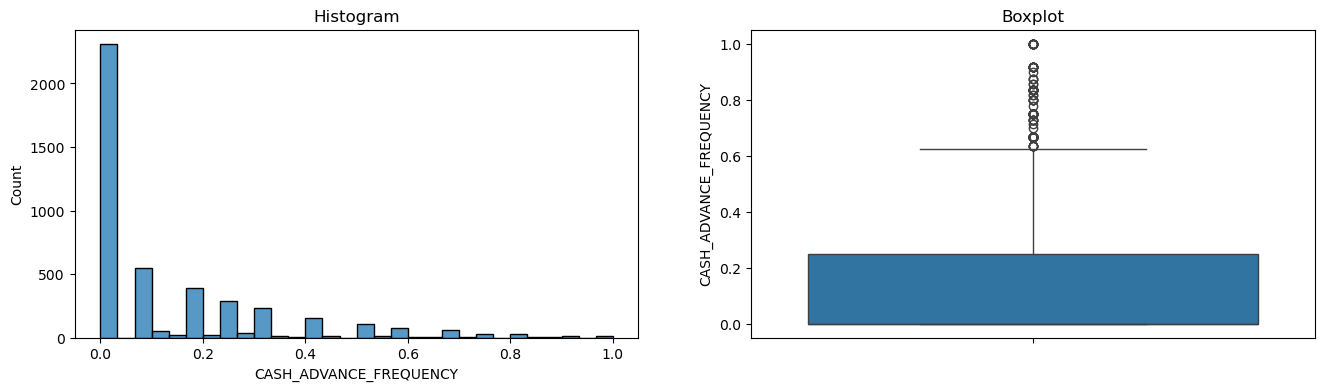

CASH_ADVANCE_TRX - Before Capping


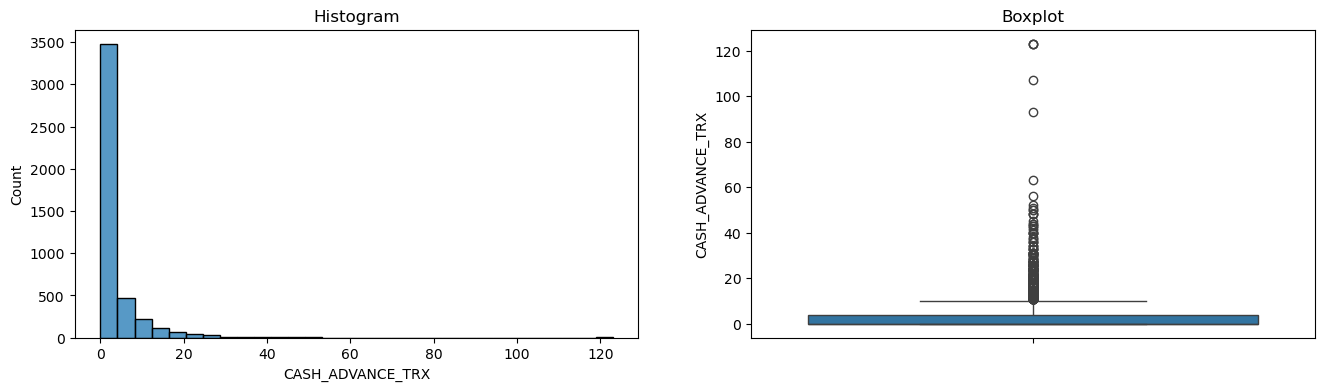


CASH_ADVANCE_TRX - After Capping


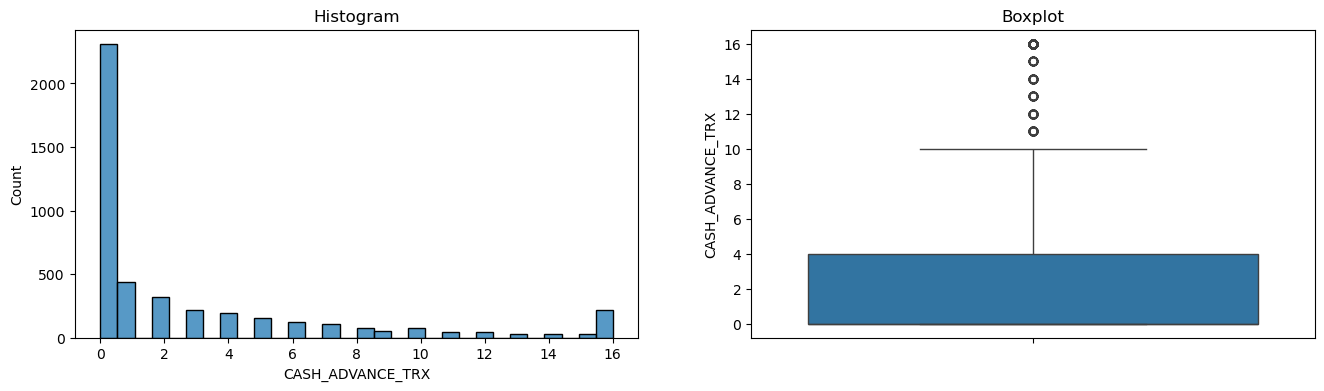

PURCHASES_TRX - Before Capping


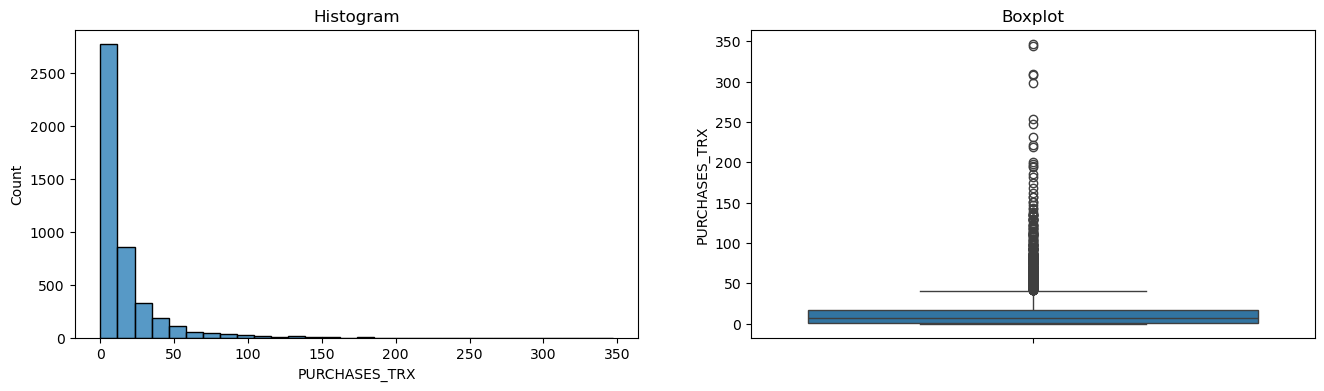


PURCHASES_TRX - After Capping


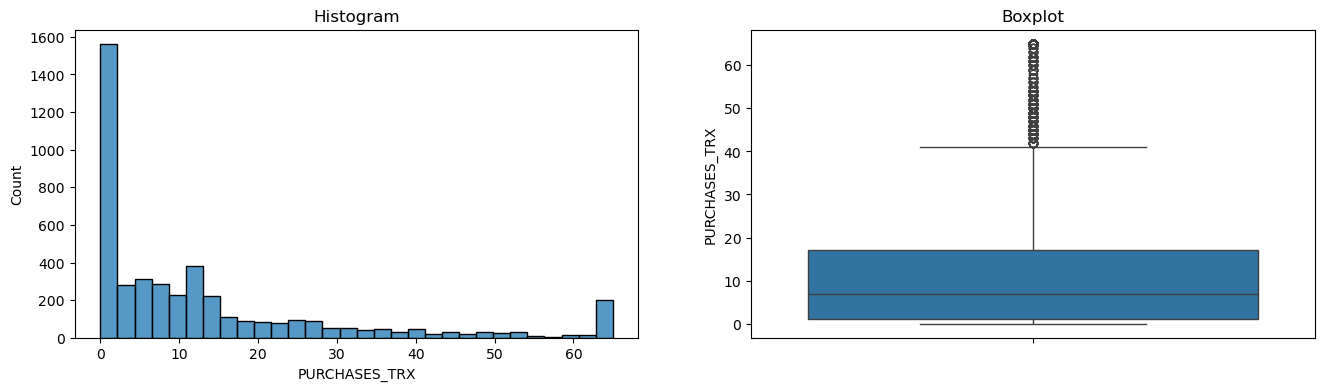

CREDIT_LIMIT - Before Capping


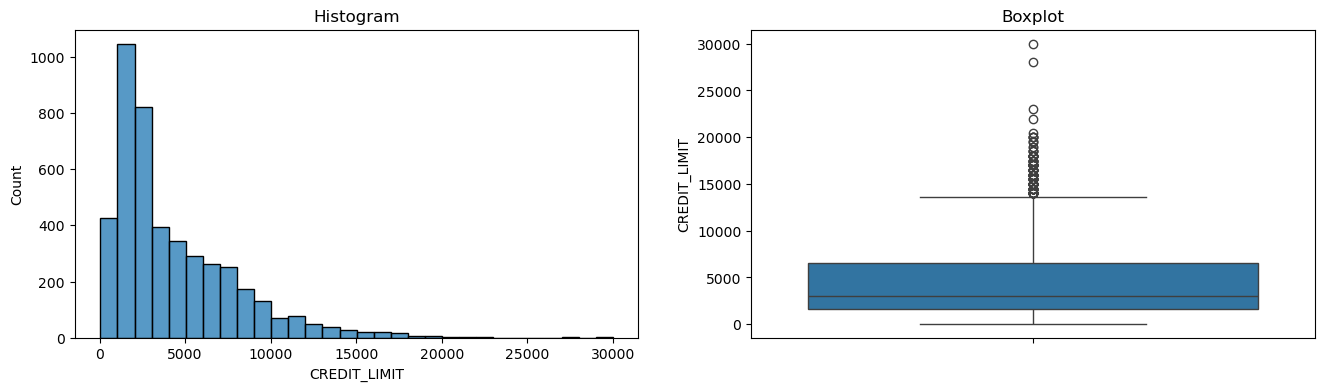


CREDIT_LIMIT - After Capping


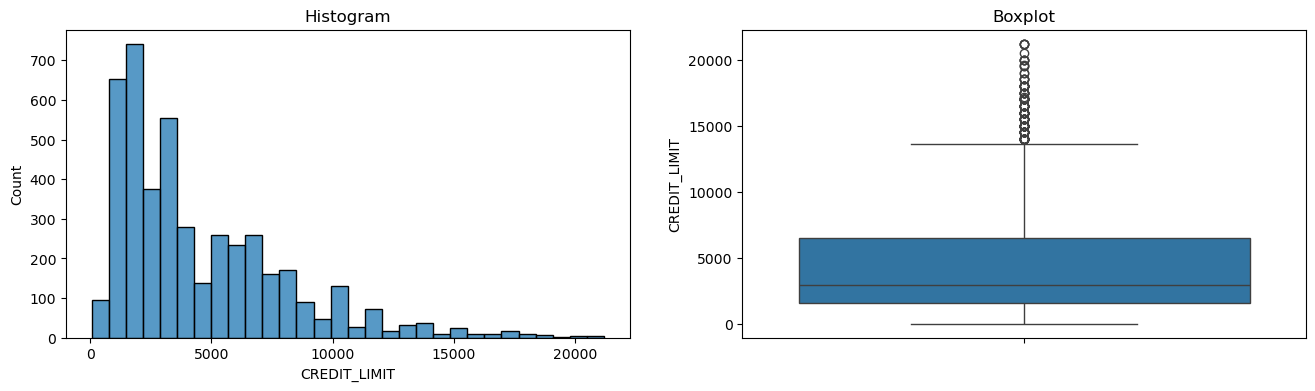

PAYMENTS - Before Capping


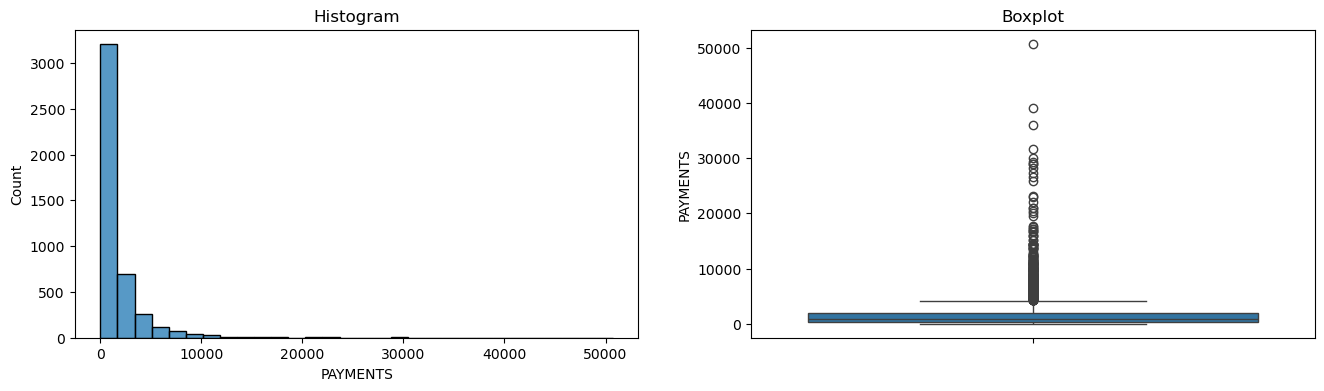


PAYMENTS - After Capping


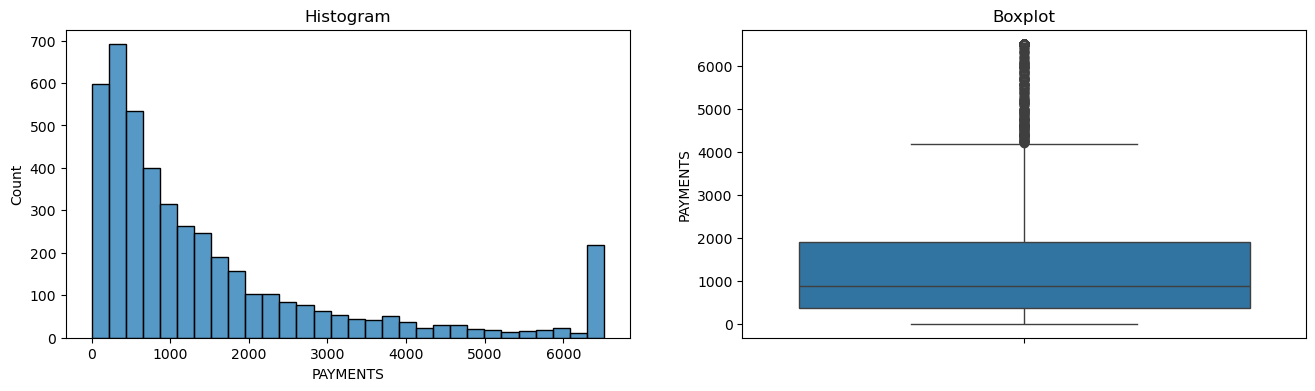

MINIMUM_PAYMENTS - Before Capping


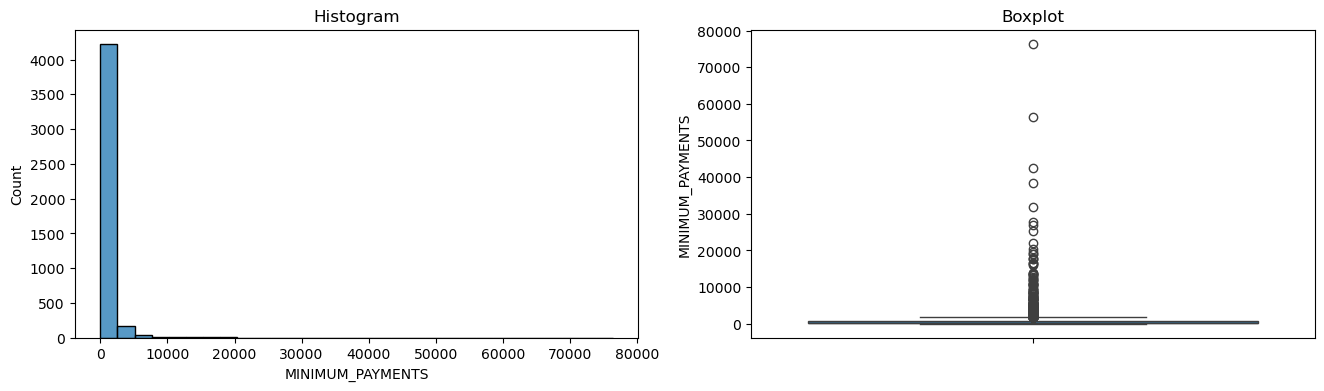


MINIMUM_PAYMENTS - After Capping


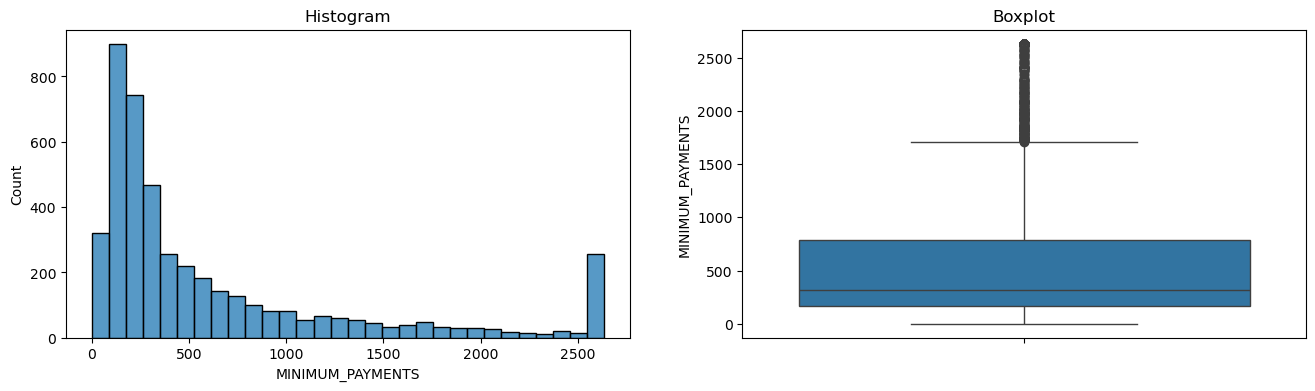

BALANCE_FREQUENCY - Before Capping


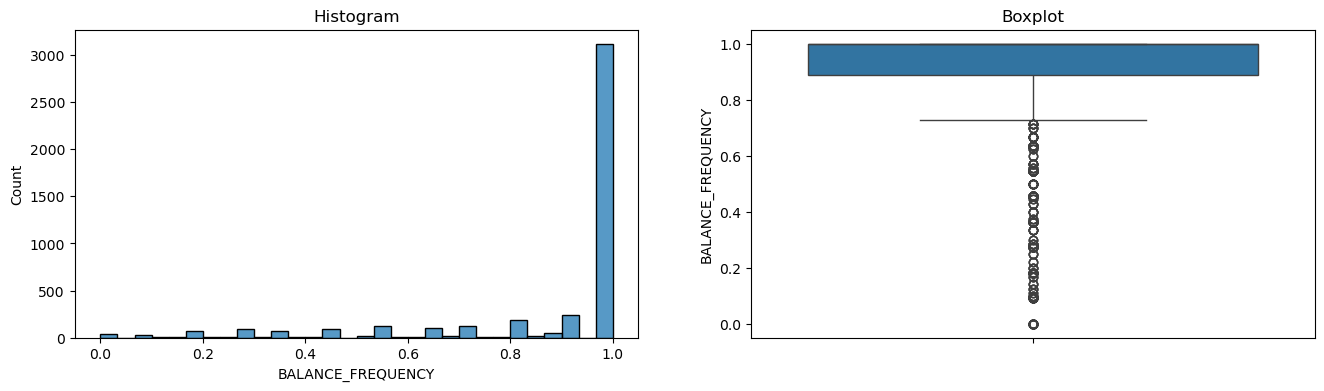


BALANCE_FREQUENCY - After Capping


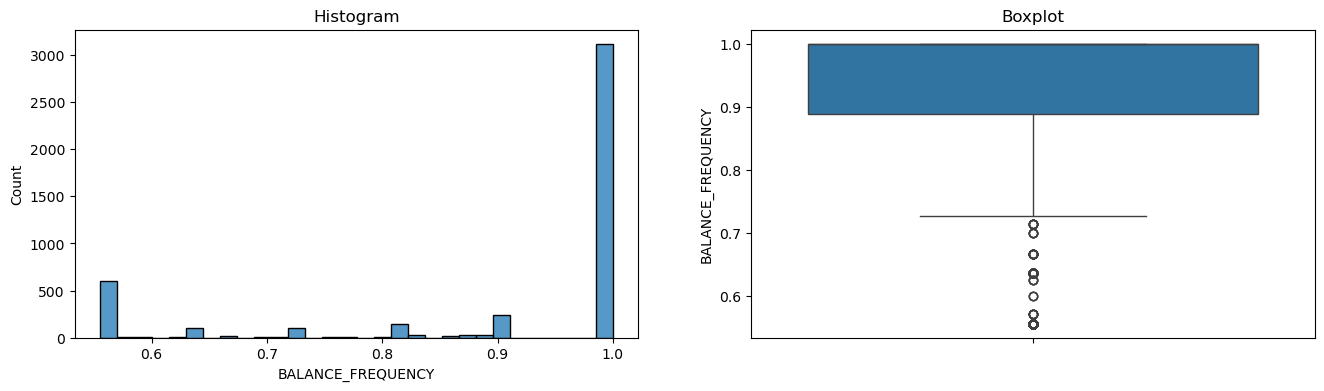

PRC_FULL_PAYMENT - Before Capping


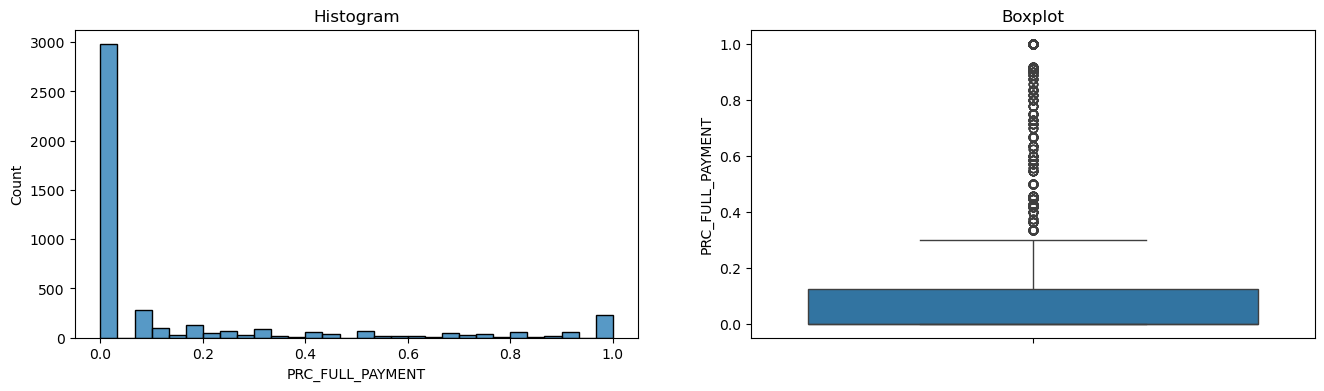


PRC_FULL_PAYMENT - After Capping


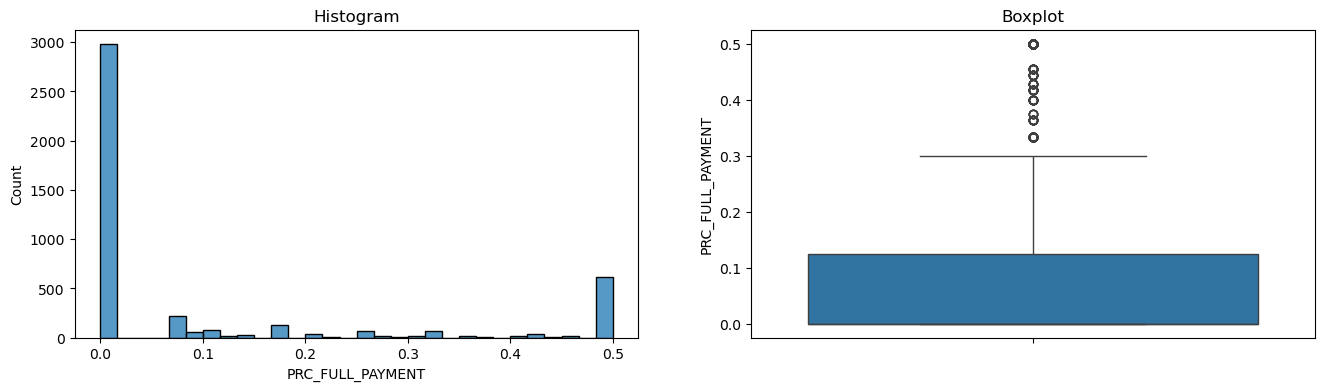

In [23]:
# Looping untuk menampilkan grafik untuk setiap kolom
for column in outlier_column:
    print(f'{column} - Before Capping')
    diagnostic_plots(dataset, column)

    print(f'\n{column} - After Capping')
    diagnostic_plots(dataset_capped, column)

Masih terdapat beberapa outlier yang ekstrem pada beberapa kolom karena outlier tidak bisa sepenuhnya dihilangkan, hanya diminimalkan, selanjutnya melihat skewness setelah dilakukan handle

In [24]:
dataset_capped.skew()

BALANCE                             1.715785
BALANCE_FREQUENCY                  -1.437962
PURCHASES                           1.785908
ONEOFF_PURCHASES                    1.707236
INSTALLMENTS_PURCHASES              1.752872
CASH_ADVANCE                        1.674018
PURCHASES_FREQUENCY                 0.058755
ONEOFF_PURCHASES_FREQUENCY          1.548319
PURCHASES_INSTALLMENTS_FREQUENCY    0.508296
CASH_ADVANCE_FREQUENCY              1.769415
CASH_ADVANCE_TRX                    1.792205
PURCHASES_TRX                       1.738371
CREDIT_LIMIT                        1.421481
PAYMENTS                            1.728184
MINIMUM_PAYMENTS                    1.690642
PRC_FULL_PAYMENT                    1.440584
TENURE                             -2.954159
dtype: float64

Jika dibandingkan dengan dataset yang sebelum dihandle, nilainya skewness pada semua kolom berubah dan yang normal masih hanya 1 kolom saja. Setelah menghandle outlier, selanjutnya adalah scaling

## Feature Scaling

Pada kolom kolom pada dataset tersebut, ada 1 yang distribusinya normal yaitu PURCHASES_FREQUENCY dan sisanya tidak normal. Saya menggunakan MinMaxScaler karena scaler ini mengubah nilai fitur ke dalam rentang 0–1, sehingga memudahkan perbandingan antar fitur dalam visualisasi dan analisis klaster. MinMaxScaler juga cocok digunakan untuk algoritma seperti K-Means yang sensitif terhadap skala karena berbasis jarak. Meskipun sensitif terhadap outlier, dalam konteks data transaksi kartu kredit, outlier bisa menggambarkan perilaku nyata pengguna, sehingga tetap relevan dan informatif untuk analisis.

In [25]:
# Define MinMaxScaler
scaler = MinMaxScaler()

#Fit scaler ke dataset
dataset_scaled = scaler.fit_transform(dataset_capped)

Setelah discaling, selanjutnya melakukan dimensionality reduction dengan PCA

## Dimensionality Reduction

Dataset memiliki banyak kolom, oleh karena itu dilakukan PCA (Principal Component Analysis) untuk mereduksi dimensi dan mempertahankan 95% informasi yang ada.

In [26]:
pca = PCA() # Inisialisasi PC
pca.fit(dataset_scaled) #Fit pada dataset

PCA()

Setelah itu melihat visualisasi dari Explained Variance Ratio dan Eigenvalue

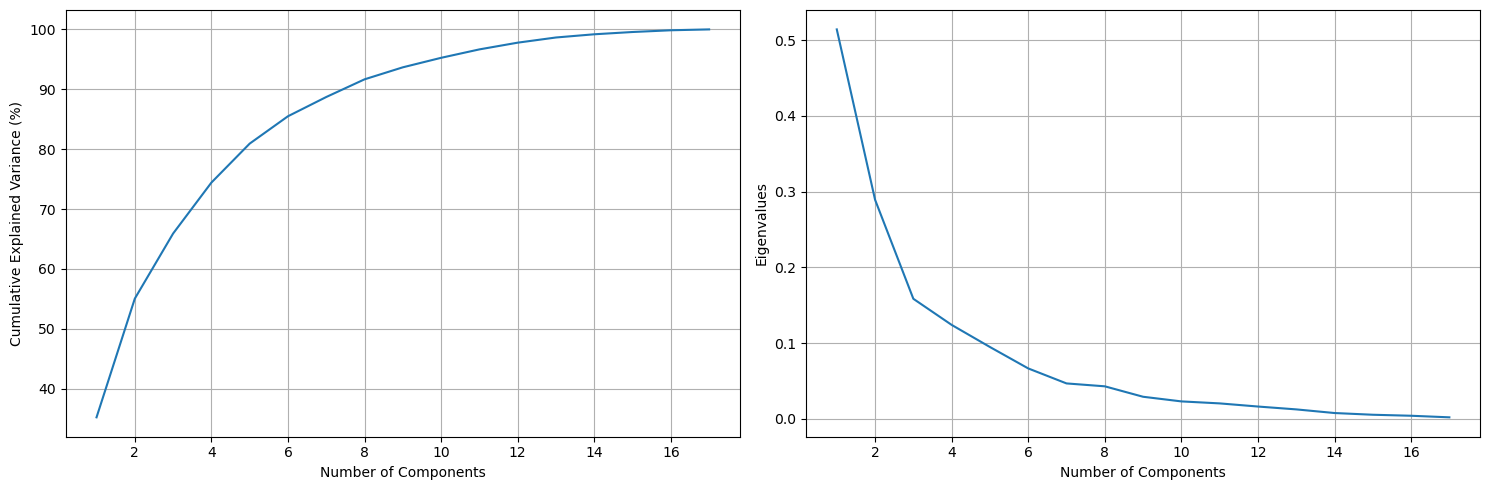

In [27]:
# Plot the Cumulative Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')

plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut, untuk mempertahankan sekitar 95% informasi dari data asli, hanya dibutuhkan 10 komponen utama saja. Hal ini menunjukkan bahwa sebagian besar informasi dapat direpresentasikan dengan lebih sedikit fitur, sehingga proses analisis menjadi lebih efisien.

In [28]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Selanjutnya melakukan reduce feature dari 17 kolom menjadi 10 kolom saja.

In [29]:
#Ttrain the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(dataset_scaled)

dataset_scaled_pca = pca.transform(dataset_scaled) #Melakukan transformasi pada data

Setelah PCA, selanjutnya mencari nilai yang optimal untuk cluster dengan elbow method dan sillhoute plot.

## Find Optimal Number for Cluster

### Elbow Method

Untuk elbow method saya akan mencari cluster yang optimal dari range 2 sampai 15

WCSS untuk setiap jumlah klaster:
Jumlah Klaster = 2 | WCSS = 4480.86
Jumlah Klaster = 3 | WCSS = 3823.49
Jumlah Klaster = 4 | WCSS = 3267.44
Jumlah Klaster = 5 | WCSS = 2854.12
Jumlah Klaster = 6 | WCSS = 2597.14
Jumlah Klaster = 7 | WCSS = 2387.88
Jumlah Klaster = 8 | WCSS = 2253.28
Jumlah Klaster = 9 | WCSS = 2142.80
Jumlah Klaster = 10 | WCSS = 2043.17
Jumlah Klaster = 11 | WCSS = 1965.39
Jumlah Klaster = 12 | WCSS = 1897.77
Jumlah Klaster = 13 | WCSS = 1830.77
Jumlah Klaster = 14 | WCSS = 1767.23
Jumlah Klaster = 15 | WCSS = 1723.01


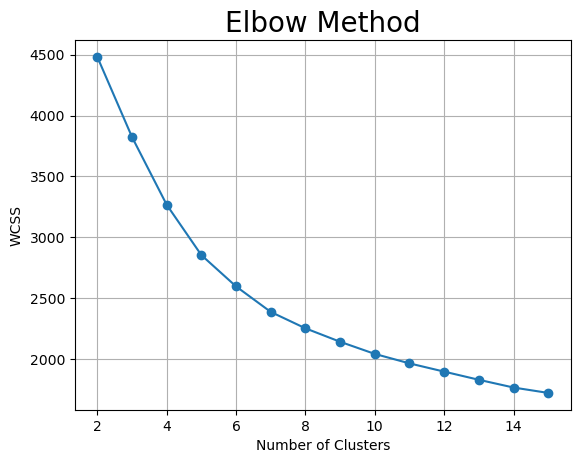

In [30]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 15

print("WCSS untuk setiap jumlah klaster:")
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=random_state)
    km.fit(dataset_scaled_pca)
    inertia = km.inertia_
    wcss.append(inertia)
    print(f'Jumlah Klaster = {i} | WCSS = {inertia:.2f}')

# Plot Elbow
plt.plot(range(2, max_cluster+1), wcss, marker="o")
plt.grid()
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Berdasarkan grafik Elbow Method dan nilai WCSS, titik elbow paling jelas terlihat pada jumlah cluster ke-4. Setelah 4 klaster, penurunan WCSS mulai melambat, menandakan bahwa menambah klaster berikutnya tidak lagi memberikan pengurangan signifikan terhadap within-cluster variance. Oleh karena itu, jumlah klaster yang optimal berdasarkan metode ini adalah 4.

Selanjutnya menggunakan teknik silhoutte score dan plot

### Silhoutte Score & Plot

Selanjutnya mencari cluster yang optimal dengan silhoutte score dan plot

In [31]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2756605442896591
For n_clusters = 3 The average silhouette_score is : 0.24810441877945605
For n_clusters = 4 The average silhouette_score is : 0.23692785627804713
For n_clusters = 5 The average silhouette_score is : 0.2522654820547703
For n_clusters = 6 The average silhouette_score is : 0.25981737021414886
For n_clusters = 7 The average silhouette_score is : 0.25974473453220265
For n_clusters = 8 The average silhouette_score is : 0.25977622297776615
For n_clusters = 9 The average silhouette_score is : 0.2639281090895048
For n_clusters = 10 The average silhouette_score is : 0.263767971165368
For n_clusters = 11 The average silhouette_score is : 0.2517357618627973
For n_clusters = 12 The average silhouette_score is : 0.25406120784044806
For n_clusters = 13 The average silhouette_score is : 0.24650012115271594
For n_clusters = 14 The average silhouette_score is : 0.26240914264487997


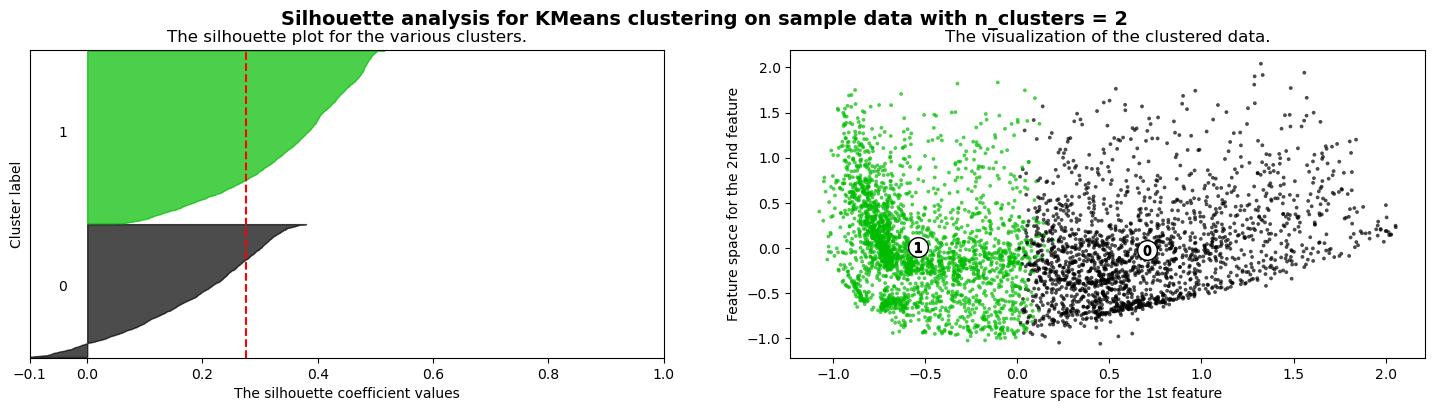

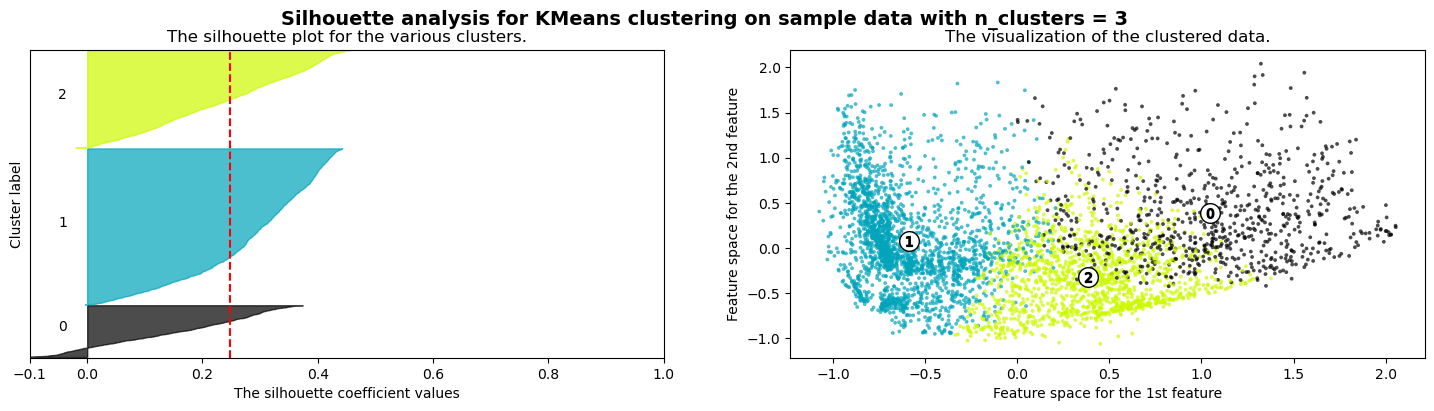

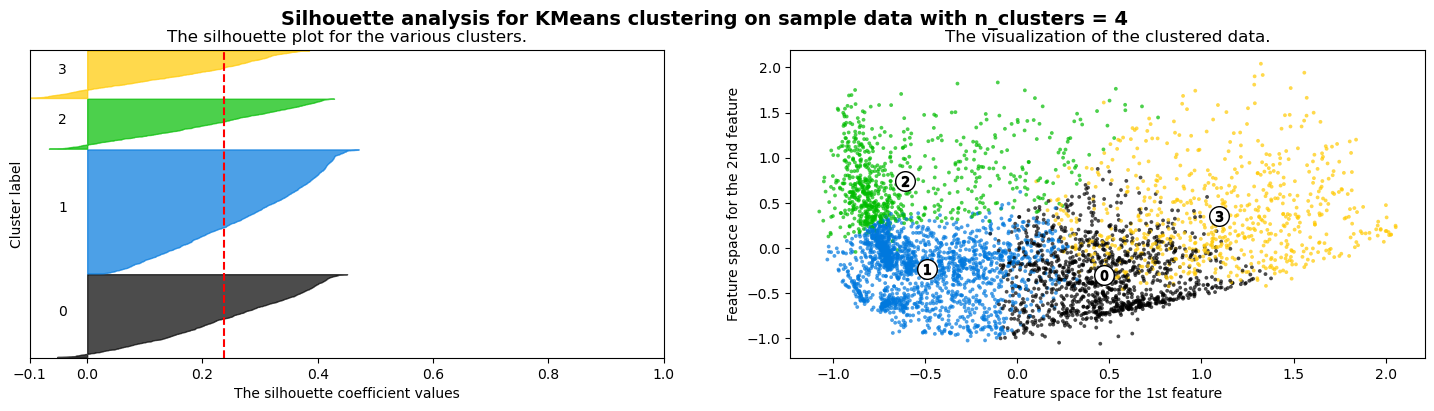

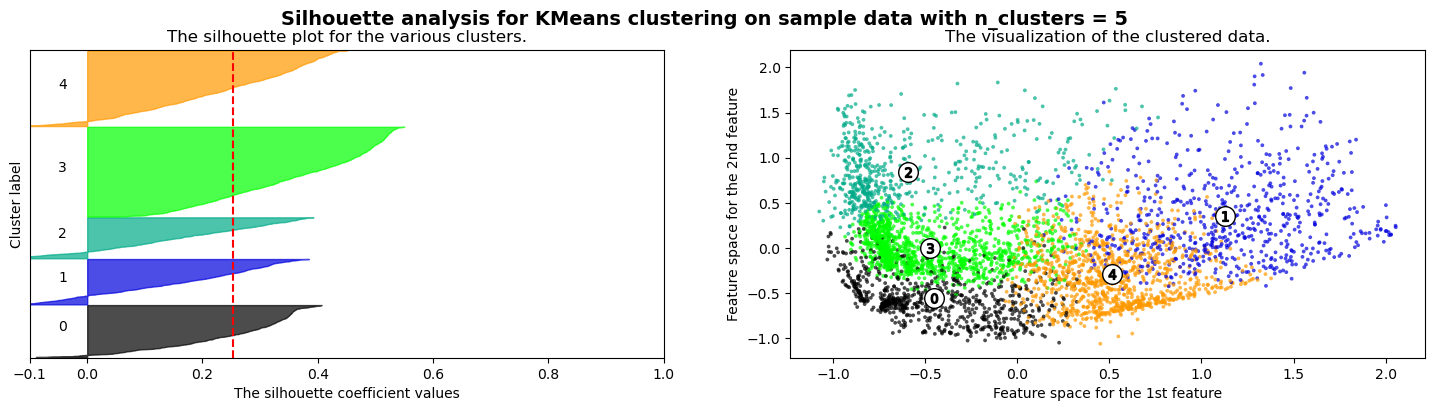

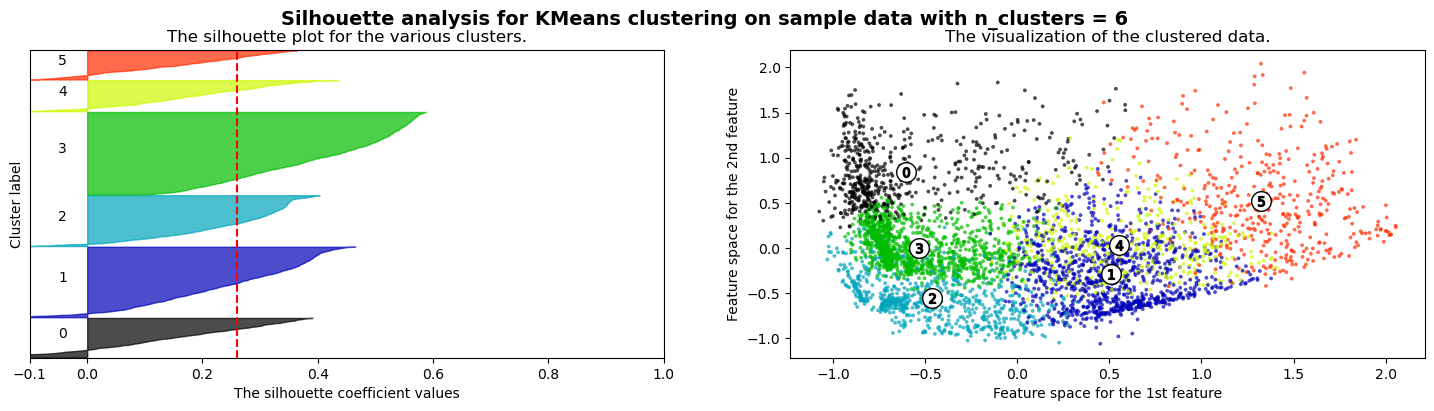

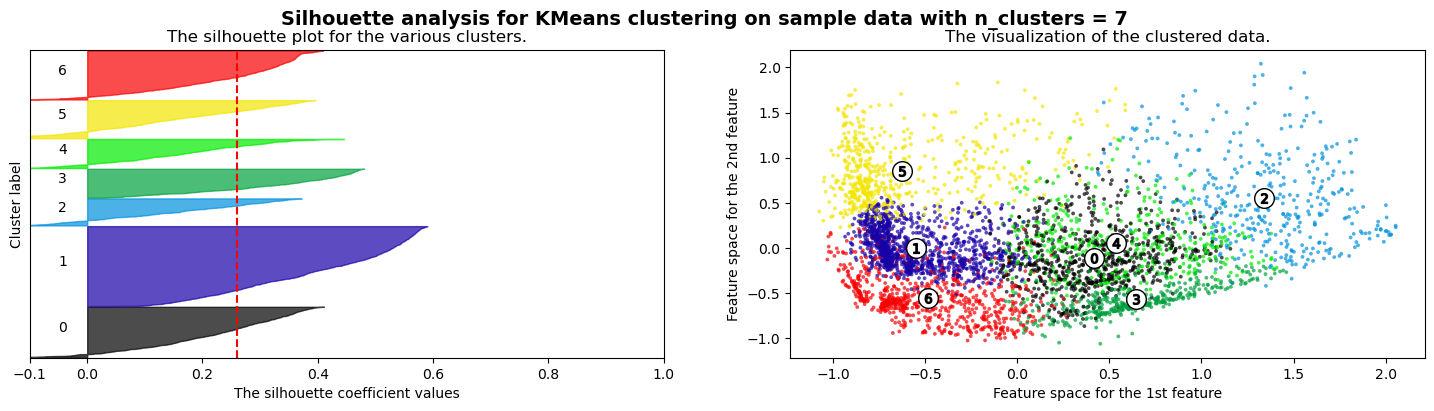

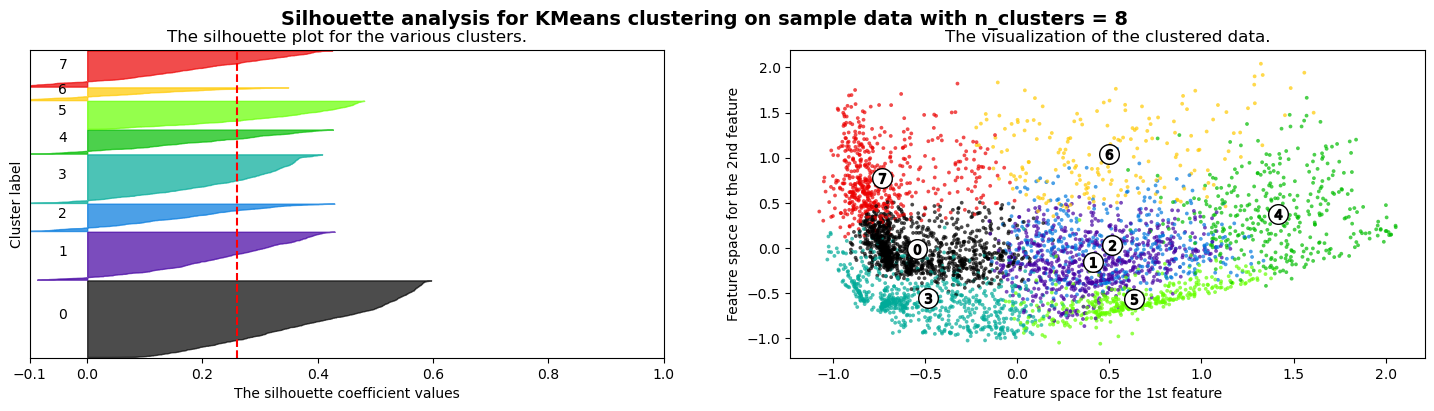

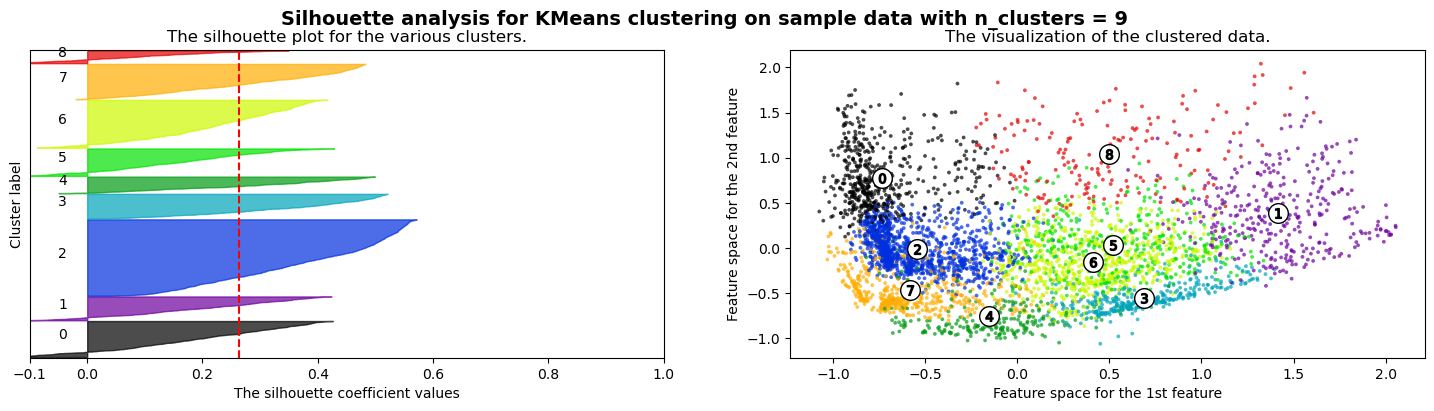

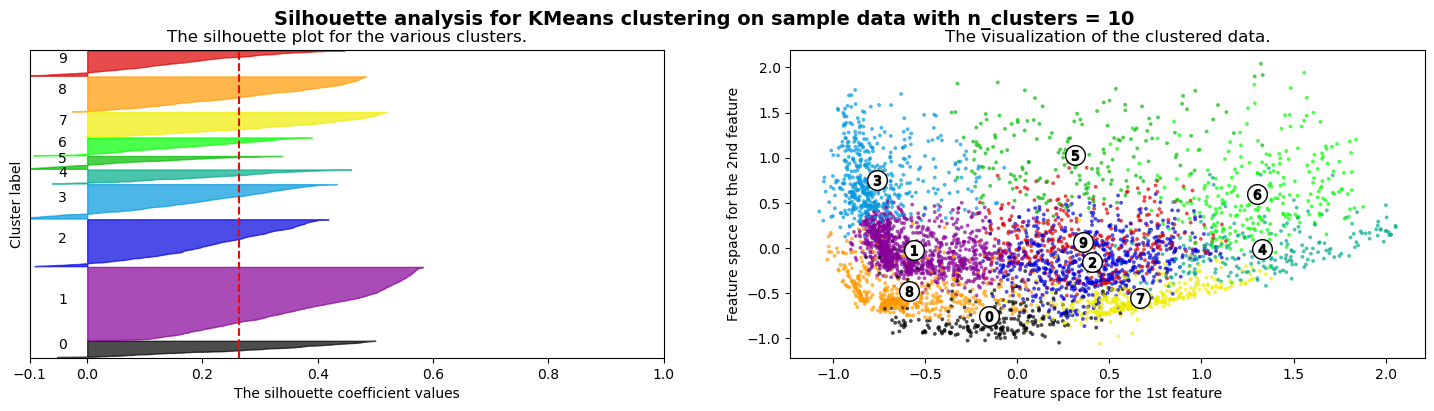

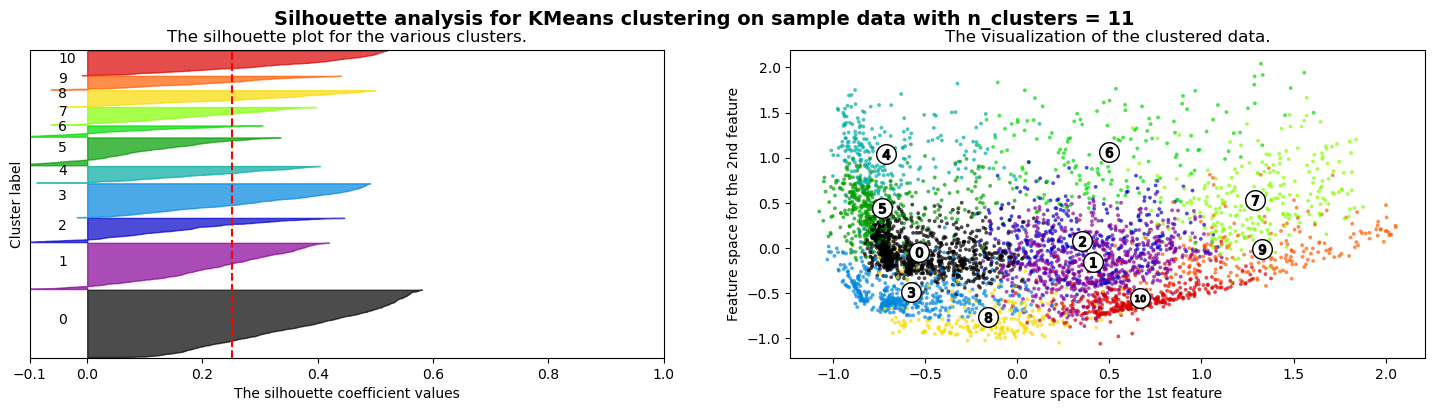

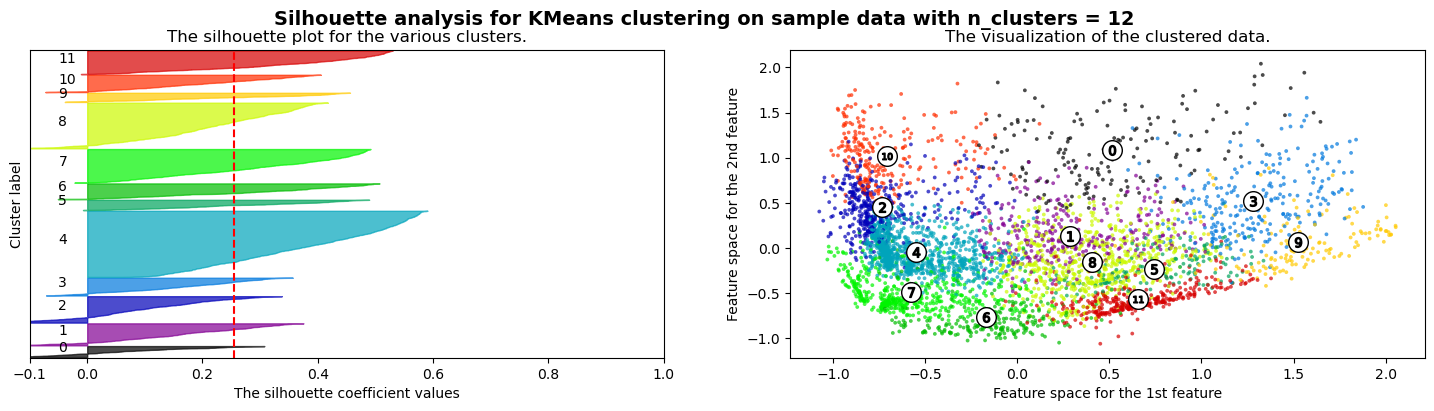

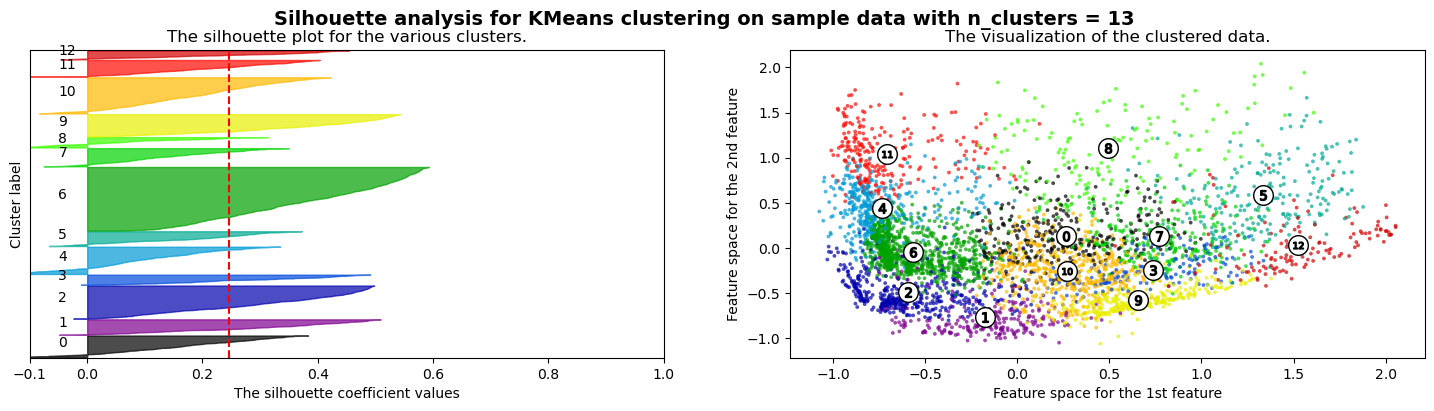

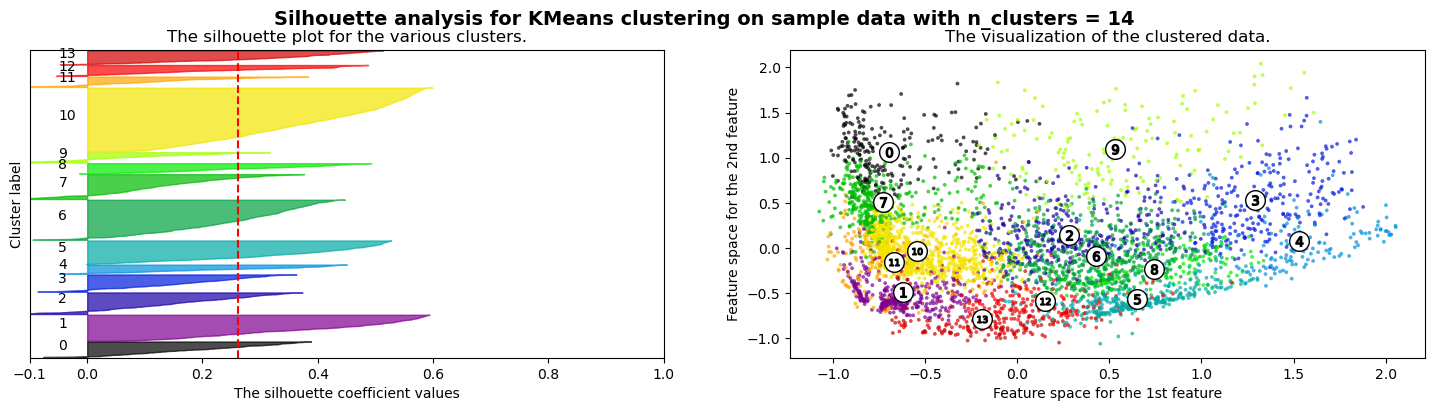

In [32]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), dataset_scaled_pca, random_state)

- Berdasarkan silhoutte score, Jumlah klaster optimal adalah 2 karena memiliki silhouette score tertinggi yaitu 0.2756605442896591. Skor ini menunjukkan bahwa pemisahan antar klaster paling baik terjadi saat data dibagi menjadi 2 klaster. Semakin tinggi skor, semakin baik kualitas klasteringnya.

- Jika dilihat pada silhoutte plot, untuk n_cluster = 2 salah satu cluster (label 0) memiliki nilai silhouette negatif. Ini mengindikasikan bahwa banyak data tersebut mungkin berada di perbatasan antar cluster, atau sulit dikategorikan dengan baik dan menunjukkan distribusi yang tidak seimbang (lihat siluet klaster 0 jauh lebih kecil daripada klaster 1), sehingga kurang ideal.

- Untuk n_clusters = 3, visualisasi menunjukkan pembagian data yang cukup jelas ke dalam tiga area yang berbeda. Dua klaster (warna biru dan kuning) memiliki bentuk siluet yang lebar dan rapi, mengindikasikan bahwa anggota dalam klaster tersebut relatif seragam dan terpisah dengan baik dari klaster lain. Satu klaster lainnya (warna hitam) menunjukkan bentuk siluet yang lebih sempit, bahkan terdapat sebagian nilai negatif, yang menandakan kemungkinan adanya tumpang tindih dengan klaster lain atau kurangnya keseragaman dalam klaster tersebut.

- Untuk n_clusters = 4, beberapa klaster terlihat terlalu kecil (seperti klaster 2 dan 3) dan memiliki silhouette score yang rendah, bahkan negatif pada klaster 0, 2, dan 3. Hal ini menunjukkan adanya ketidaksesuaian dalam pengelompokan, di mana beberapa klaster tampak tumpang tindih dan tidak terpisah dengan baik.

Berdasarkan analisis silhouette plot, penggunaan n_clusters = 3 memberikan hasil pengelompokan yang paling optimal dibandingkan jumlah klaster lainnya. Pada n = 2, meskipun sederhana, salah satu klaster memiliki nilai silhouette negatif dan distribusi yang tidak seimbang, menunjukkan bahwa pemisahan klaster kurang baik. Sementara itu, pada n = 4, beberapa klaster terlihat terlalu kecil dan memiliki nilai silhouette yang rendah atau bahkan negatif, mengindikasikan adanya tumpang tindih dan ketidaksesuaian dalam pembagian klaster. Sebaliknya, pada n = 3, dua dari tiga klaster menunjukkan bentuk siluet yang lebar dan rapi, menggambarkan pemisahan yang baik dan keseragaman dalam klaster. Meskipun satu klaster memiliki sebagian nilai negatif, secara keseluruhan struktur pengelompokan lebih seimbang dan interpretatif, sehingga 3 klaster dinilai sebagai jumlah yang paling tepat.

Berdasarkan dua metode evaluasi klaster yang digunakan, yaitu Elbow Method dan Silhouette Analysis, jumlah klaster yang optimal menunjukkan hasil yang berbeda. Elbow Method mengindikasikan bahwa jumlah klaster optimal berada pada angka 4, karena pada titik ini penurunan nilai WCSS mulai melambat secara signifikan, menandakan bahwa penambahan klaster setelahnya tidak lagi memberikan manfaat besar dalam menurunkan variansi dalam klaster. 

Namun, berdasarkan Silhouette Analysis, jumlah klaster yang paling optimal adalah 3, karena memberikan nilai rata-rata silhouette yang lebih tinggi, dengan dua dari tiga klaster menunjukkan bentuk siluet yang lebar dan rapi. Meskipun satu klaster memiliki nilai negatif, keseluruhan struktur pengelompokannya tetap lebih seimbang dan dapat diinterpretasikan dengan baik. Oleh karena itu, jika tujuan analisis adalah untuk mendapatkan pemisahan yang lebih jelas dan kualitas pengelompokan yang lebih baik, maka jumlah klaster 3 dinilai sebagai pilihan yang lebih tepat.

Setelah menentukan jumlah klaster yang optimal, selanjutnya melakukan model definition

# BAB 7 - Model Definition

Algoritma yang digunakan yaitu K-Means, karena kolom kolom pada data ini nilainya numerik semua dan cocok digunakan ketika kita ingin membagi data ke dalam beberapa segmen atau kelompok berdasarkan kemiripan karakteristiknya.

In [33]:
#Define Model
km = KMeans(n_clusters = 3, random_state = random_state)

Selanjutnya melakukan training

# BAB 8 - Model Training

In [34]:
pred = km.fit_predict(dataset_scaled_pca)
pred

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

Selanjutnya melakukan evaluasi dengan melihat karakteristik dari setiap klaster

# BAB 9 - Model Evaluation

Saya menggabungkan hasil klaster ke dalam data setelah dilakukan penanganan outlier karena proses clustering sebelumnya juga dilakukan pada data yang sudah dibersihkan dari nilai ekstrem. Dengan begitu, interpretasi karakteristik setiap klaster menjadi lebih akurat, dan representatif terhadap pola sebenarnya dalam data.

In [35]:
dataset_capped['Cluster'] = pred

In [36]:
dataset_capped

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0.570113           0.555556      29.00              29.0   
1       22.353780           0.555556     284.50             284.5   
2        3.307286           0.555556      60.00              60.0   
3      287.817221           1.000000     360.00             360.0   
4        2.880247           0.555556     250.00             250.0   
...           ...                ...        ...               ...   
4470  3467.619262           1.000000     468.49             278.5   
4471   443.339878           1.000000       0.00               0.0   
4472  2847.472954           1.000000       0.00               0.0   
4473  1184.529629           1.000000     467.32               0.0   
4474  6477.299600           1.000000       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.083333   
1                       0.00      0.000000             0.083333   
2                       0.00      0.000000             0.083333   
3                       0.00      0.000000             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
4470                  189.99   2493.180667             0.833333   
4471                    0.00    857.622301             0.000000   
4472                    0.00   3800.293424             0.000000   
4473                  467.32   2337.837011             1.000000   
4474                    0.00   2436.195048             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.083333                          0.000000   
1                       0.083333                          0.000000   
2                       0.083333                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
4470                    0.083333                          0.666667   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          1.000000   
4474                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        2500.0   
1                   0.000000                 0              2        1000.0   
2                   0.000000                 0              1       11000.0   
3                   0.000000                 0              1        3000.0   
4                   0.000000                 0              1        2000.0   
...                      ...               ...            ...           ...   
4470                0.500000                10             10        4000.0   
4471                0.555556                 5              0        1200.0   
4472                0.583333                16              0        4000.0   
4473                0.583333                 7             25        6500.0   
4474                0.666667                 8              0       11500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      319.172687        313.980229          0.000000      12        1  
1     1578.650857         86.173877          0.000000      12        1  
2     1042.001588        313.980229          0.000000      12        1  
3      112.678222        208.247475          0.000000      12        1  
4     1401.222628        159.142575          0.000000      12        1  
...           ...               ...               ...     ...      ...  
4470  1612.002883        898.050967          0.000000      12        2  
44

Hasil tersebut merupakan hasil dari pengelompokan cluster 0, 1, dan 2. Setelah itu melakukan EDA untuk mengetahui karakteristik dari masing masing cluster

Saya akan mengelompokan datanya terlebih dahulu berdasarkan cluster

In [37]:
# Mengelompokkan data dimana Cluster == 1
cluster_1 = dataset_capped[dataset_capped['Cluster'] == 1]
cluster_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0.570113           0.555556       29.0              29.0   
1       22.353780           0.555556      284.5             284.5   
2        3.307286           0.555556       60.0              60.0   
3      287.817221           1.000000      360.0             360.0   
4        2.880247           0.555556      250.0             250.0   
...           ...                ...        ...               ...   
4468    51.422178           0.636364        0.0               0.0   
4469  1488.113177           1.000000        0.0               0.0   
4471   443.339878           1.000000        0.0               0.0   
4472  2847.472954           1.000000        0.0               0.0   
4474  6477.299600           1.000000        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.083333   
1                        0.0      0.000000             0.083333   
2                        0.0      0.000000             0.083333   
3                        0.0      0.000000             0.083333   
4                        0.0      0.000000             0.083333   
...                      ...           ...                  ...   
4468                     0.0   1504.179802             0.000000   
4469                     0.0   2599.489045             0.000000   
4471                     0.0    857.622301             0.000000   
4472                     0.0   3800.293424             0.000000   
4474                     0.0   2436.195048             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.083333                               0.0   
1                       0.083333                               0.0   
2                       0.083333                               0.0   
3                       0.083333                               0.0   
4                       0.083333                               0.0   
...                          ...                               ...   
4468                    0.000000                               0.0   
4469                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4474                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1        2500.0   
1                   0.000000                 0              2        1000.0   
2                   0.000000                 0              1       11000.0   
3                   0.000000                 0              1        3000.0   
4                   0.000000                 0              1        2000.0   
...                      ...               ...            ...           ...   
4468                0.500000                16              0        5500.0   
4469                0.500000                15              0        2500.0   
4471                0.555556                 5              0        1200.0   
4472                0.583333                16              0        4000.0   
4474                0.666667                 8              0       11500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      319.172687        313.980229          0.000000      12        1  
1     1578.650857         86.173877          0.000000      12        1  
2     1042.001588        313.980229          0.000000      12        1  
3      112.678222        208.247475          0.000000      12        1  
4     1401.222628        159.142575          0.000000      12        1  
...           ...               ...               ...     ...      ...  
4468  1444.167453         70.384975          0.363636      12        1  
44

Data tersebut merupakan data cluster 1 yang berjumlah 2.289 baris

In [38]:
# Mengelompokkan data dimana Cluster == 2
cluster_2 = dataset_capped[dataset_capped['Cluster'] == 2]
cluster_2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
12      31.560931           0.555556     300.00              0.00   
13      31.812848           0.636364     662.00            235.00   
15    1289.327381           1.000000     892.00            563.00   
16    1606.875936           1.000000    1863.48           1302.00   
17    1832.539694           1.000000    1311.80           1076.16   
...           ...                ...        ...               ...   
4451   579.574720           0.909091    1337.50              0.00   
4460  1073.370435           0.818182     824.77            377.81   
4461  2493.134397           1.000000     253.00             28.00   
4470  3467.619262           1.000000     468.49            278.50   
4473  1184.529629           1.000000     467.32              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
12                    300.00      0.000000             0.500000   
13                    427.00      0.000000             0.500000   
15                    329.00      0.000000             0.583333   
16                    561.48      0.000000             0.666667   
17                    235.64      0.000000             0.750000   
...                      ...           ...                  ...   
4451                 1337.50   1059.315760             0.583333   
4460                  446.96   1214.495468             0.666667   
4461                  225.00   2622.759643             0.833333   
4470                  189.99   2493.180667             0.833333   
4473                  467.32   2337.837011             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
12                      0.000000                          0.500000   
13                      0.083333                          0.416667   
15                      0.250000                          0.250000   
16                      0.083333                          0.666667   
17                      0.500000                          0.416667   
...                          ...                               ...   
4451                    0.000000                          0.583333   
4460                    0.416667                          0.500000   
4461                    0.083333                          0.750000   
4470                    0.083333                          0.666667   
4473                    0.000000                          1.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
12                  0.000000                 0              6        1000.0   
13                  0.000000                 0              7        3500.0   
15                  0.000000                 0             14        3500.0   
16                  0.000000                 0             20        6500.0   
17                  0.000000                 0             30        2500.0   
...                      ...               ...            ...           ...   
4451                0.166667                 6             11        1500.0   
4460                0.333333                 6             25        1800.0   
4461                0.333333                 8             11        2900.0   
4470                0.500000                10             10        4000.0   
4473                0.583333                 7             25        6500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
12     588.763068        143.339280          0.500000      12        2  
13     955.231844        127.625326          0.500000      12        2  
15     655.143647        360.636863          0.000000      12        2  
16     698.650140        328.146908          0.000000      12        2  
17     384.218293        652.773095          0.000000      12        2  
...           ...               ...               ...     ...      ...  
4451  2772.615528       2632.441186          0.100000      12        2  
44

Data tersebut merupakan data cluster 2 yang berjumlah 1.426 baris

In [39]:
# Mengelompokkan data dimana Cluster == 0
cluster_0 = dataset_capped[dataset_capped['Cluster'] == 0]
cluster_0

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
14     975.637547           0.818182    4291.00              0.00   
21    1140.787563           1.000000    2796.54           2096.49   
24     250.060059           1.000000    2405.97           2182.22   
27    2070.627593           1.000000    2564.08           1165.00   
28    4395.237251           1.000000    2514.30            985.11   
...           ...                ...        ...               ...   
4456  7816.984649           1.000000    1168.75              0.00   
4457  5036.870531           1.000000    1752.15           1564.16   
4458  5366.532372           1.000000    4291.00           2300.88   
4459  2574.852985           1.000000     578.66            578.66   
4462  3714.539663           1.000000    1307.16           1307.16   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
14                   1823.54      0.000000             0.500000   
21                    700.05      0.000000             0.833333   
24                    223.75      0.000000             1.000000   
27                   1399.08      0.000000             1.000000   
28                   1529.19      0.000000             1.000000   
...                      ...           ...                  ...   
4456                 1168.75   3183.037625             0.916667   
4457                  187.99   1072.351863             1.000000   
4458                 1823.54    744.096753             1.000000   
4459                    0.00   4555.551016             1.000000   
4462                    0.00   4245.840374             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
14                      0.000000                          0.500000   
21                      0.166667                          0.750000   
24                      0.916667                          0.416667   
27                      0.583333                          1.000000   
28                      0.666667                          1.000000   
...                          ...                               ...   
4456                    0.000000                          0.916667   
4457                    0.916667                          0.583333   
4458                    0.500000                          0.916667   
4459                    1.000000                          0.000000   
4462                    1.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
14                  0.000000                 0              6        6150.0   
21                  0.000000                 0             15        4500.0   
24                  0.000000                 0             36       10000.0   
27                  0.000000                 0             57        8500.0   
28                  0.000000                 0             32        5000.0   
...                      ...               ...            ...           ...   
4456                0.250000                 5             11       16500.0   
4457                0.250000                 4             53       10300.0   
4458                0.250000                 3             44       11000.0   
4459                0.272727                 4             12        9500.0   
4462                0.333333                 4             24        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
14    6515.646969       2632.441186          0.272727      12        0  
21    2139.874585        260.662747          0.000000      12        0  
24    2105.342196        188.130216          0.500000      12        0  
27    1363.695769        628.433833          0.000000      12        0  
28    2095.014385       1960.982734          0.000000      12        0  
...           ...               ...               ...     ...      ...  
4456  3906.738592       2632.441186          0.000000      12        0  
44

Data tersebut merupakan data cluster 3 yang berjumlah 760 baris

Setelah itu saya ingin melihat distribusi data pada setiap kolomnya di setiap cluster

In [40]:
# Menghilangkan kolom 'Cluster' untuk perhitungan skewness
skew_values0 = cluster_0.drop(columns=['Cluster']).skew()

# Tampilkan nilai skewness
print(skew_values0)

BALANCE                             1.108066
BALANCE_FREQUENCY                  -4.203356
PURCHASES                          -0.146733
ONEOFF_PURCHASES                   -0.604049
INSTALLMENTS_PURCHASES              0.166691
CASH_ADVANCE                        1.859384
PURCHASES_FREQUENCY                -2.114620
ONEOFF_PURCHASES_FREQUENCY         -0.546968
PURCHASES_INSTALLMENTS_FREQUENCY   -0.632948
CASH_ADVANCE_FREQUENCY              2.167573
CASH_ADVANCE_TRX                    2.007341
PURCHASES_TRX                       0.010362
CREDIT_LIMIT                        0.889607
PAYMENTS                            0.557559
MINIMUM_PAYMENTS                    1.078762
PRC_FULL_PAYMENT                    0.873426
TENURE                             -6.216284
dtype: float64


Pada cluster 0, variabel yang mendekati distribusi normal (nilai skewness berada di kisaran -0.5 hingga 0.5) adalah PURCHASES, INSTALLMENTS_PURCHASES, dan PURCHASES_TRX. Sementara itu, ONEOFF_PURCHASES_FREQUENCY memiliki nilai skewness sebesar -0.546968, yang sedikit di luar batas normal, sehingga masih dapat dipertimbangkan mendekati normal. Sisanya menunjukkan distribusi yang tidak normal karena memiliki skewness yang cukup tinggi atau rendah.

In [41]:
# Menghilangkan kolom 'Cluster' untuk perhitungan skewness
skew_values1 = cluster_1.drop(columns=['Cluster']).skew()

# Tampilkan nilai skewness
print(skew_values1)

BALANCE                             1.470125
BALANCE_FREQUENCY                  -1.069930
PURCHASES                           3.376502
ONEOFF_PURCHASES                    2.821106
INSTALLMENTS_PURCHASES              6.275625
CASH_ADVANCE                        1.104128
PURCHASES_FREQUENCY                 1.433424
ONEOFF_PURCHASES_FREQUENCY          2.188980
PURCHASES_INSTALLMENTS_FREQUENCY    2.742620
CASH_ADVANCE_FREQUENCY              1.284324
CASH_ADVANCE_TRX                    1.257577
PURCHASES_TRX                       3.482145
CREDIT_LIMIT                        1.418872
PAYMENTS                            1.968543
MINIMUM_PAYMENTS                    1.601889
PRC_FULL_PAYMENT                    3.302264
TENURE                             -2.684118
dtype: float64


Pada cluster 1, seluruh variabel menunjukkan distribusi yang tidak normal karena memiliki nilai skewness di luar rentang -0.5 hingga 0.5. 

In [42]:
# Menghilangkan kolom 'Cluster' untuk perhitungan skewness
skew_values2 = cluster_2.drop(columns=['Cluster']).skew()

# Tampilkan nilai skewness
print(skew_values2)

BALANCE                             2.727970
BALANCE_FREQUENCY                  -1.437244
PURCHASES                           1.720197
ONEOFF_PURCHASES                    2.065566
INSTALLMENTS_PURCHASES              1.377570
CASH_ADVANCE                        3.881161
PURCHASES_FREQUENCY                -0.801477
ONEOFF_PURCHASES_FREQUENCY          2.322615
PURCHASES_INSTALLMENTS_FREQUENCY   -0.858360
CASH_ADVANCE_FREQUENCY              3.313979
CASH_ADVANCE_TRX                    3.731847
PURCHASES_TRX                       2.016623
CREDIT_LIMIT                        1.739085
PAYMENTS                            2.843511
MINIMUM_PAYMENTS                    2.478724
PRC_FULL_PAYMENT                    0.493684
TENURE                             -2.695378
dtype: float64


Berdasarkan nilai skewness, sebagian besar variabel memiliki distribusi tidak normal karena nilai skewness berada di luar rentang -0.5 hingga 0.5. Untuk yang mendekati normal hanya PRC_FULL_PAYMENT dengan nilai 0.493684

Karena sebagian besar variabel dalam setiap klaster tidak normal, analisis dilakukan dengan menggunakan median untuk semua variabel. Median lebih tahan terhadap outlier yang bisa memengaruhi hasil, sedangkan mean bisa terpengaruh oleh nilai ekstrem. Dengan median, hasil analisis jadi lebih stabil dan menggambarkan karakteristik klaster dengan lebih akurat, meski ada variasi besar dalam data.

In [43]:
# Mengelompokkan data berdasarkan kolom 'Cluster' dan menghitung median untuk setiap klaster
cluster_median = dataset_capped.groupby('Cluster').median()

# Reset indeks agar 'Cluster' menjadi kolom kembali
cluster_median = cluster_median.reset_index()

# Menampilkan median untuk setiap klaster
cluster_median


Cluster      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        0  1475.634117                1.0   2798.035          1749.045   
1        1  1138.554361                1.0     45.650             0.000   
2        2   157.787634                1.0    547.370             0.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 762.605       0.00000             1.000000   
1                   0.000     490.12386             0.083333   
2                 399.000       0.00000             0.916667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.690476                          0.750000   
1                    0.000000                          0.000000   
2                    0.000000                          0.818182   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0           38.0        6500.0   
1                0.166667               2.0            1.0        3000.0   
2                0.000000               0.0           12.0        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  2618.699078        453.485017          0.000000    12.0  
1   706.605439        389.138517          0.000000    12.0  
2   632.092432        181.434904          0.083333    12.0

Berikut adalah karakteristik masing-masing klaster:
- Cluster 0: Nasabah Aktif Belanja

Nasabah klaster ini memiliki median saldo (BALANCE ~1475) yang paling tinggi dibanding klaster lainnya, begitu juga dengan batas kredit (CREDIT_LIMIT ~6500)—tertinggi dari ketiga klaster. Mereka juga yang paling aktif dalam berbelanja dibanding dengan klaster lain , dengan median total pembelian (PURCHASES ~2798) dan frekuensi pembelian yang maksimal (PURCHASES_FREQUENCY = 1.0). Mereka bertransaksi secara seimbang antara sekali bayar (ONEOFF_PURCHASES ~1749) tertinggi dibanding cluster lain dan cicilan (INSTALLMENTS_PURCHASES ~763) tertinggi dibanding cluster lain. Meskipun mereka tidak menggunakan fitur cash advance sama sekali, mereka punya jumlah pembayaran total paling besar dibanding dengan cluster lain (PAYMENT~2619) meski tetap tidak melunasi tagihan secara penuh (PRC_FULL_PAYMENT = 0). Ini menunjukkan bahwa klaster ini terdiri dari nasabah sangat aktif secara konsumtif, memiliki kemampuan pembayaran yang baik, meski masih belum menyelesaikan tagihan secara penuh.

- Cluster 1: Nasabah Minim Transaksi, Cenderung Tarik Tunai

Klaster ini punya saldo menengah atau urutan ke 2 jika dibandingkan klaster lain (BALANCE ~1139) dan batas kredit sedang atau urutan ke 2 jika dibandingkan klaster lain (~3000). Namun, mereka hampir tidak menggunakan kartu untuk belanja sama sekali—baik dalam bentuk sekali bayar atau cicilan (keduanya = 0), dengan median total pembelian hanya (PURCHASES~46), paling rendah di semua klaster. Di sisi lain, mereka justru cukup aktif menggunakan fitur cash advance (CASH_ADVANCE ~490), tertinggi di antara cluster lain. Pembayaran minimum (MINIMUM_PAYMENTS ~389) menengah atau urutan ke 2 jika dibandingkan klaster lain, dan mereka tidak pernah melunasi tagihan penuh (PRC_FULL_PAYMENT = 0). Karakter ini menunjukkan bahwa nasabah dalam klaster ini cenderung menggunakan kartu kredit sebagai alat untuk mendapatkan dana tunai, dengan aktivitas transaksi konsumtif yang sangat rendah, serta perilaku pembayaran yang tidak optimal.

- Cluster 2: Nasabah Pengguna Cicilan yang Stabil

Dengan median saldo paling rendah diantara cluster lain (~158) dan batas kredit terendah diantara cluster lain (~2500), nasabah ini justru menunjukkan aktivitas pembelian yang sedang atau urutan ke 2 jika dibandingkan cluster lain (PURCHASES ~547), terutama lewat cicilan (INSTALLMENTS_PURCHASES ~399) sedang atau urutan ke 2 jika dibandingkan cluster lain dan mereka tidak menggunakan pembelian sekali bayar sama sekali. Frekuensi pembelian juga sedang atau urutan ke 2 jika dibandingkan cluster lain (PURCHASES_FREQUENCY ~0.92), bahkan lebih tinggi dibanding klaster 1. Cash advance tidak digunakan sama sekali, menunjukkan bahwa fokus mereka memang konsumtif, bukan tarik tunai. Pembayaran yang dilakukan paling rendah jika dibandingkan cluster lain (PAYMENTS ~632), dan mereka memiliki tendensi melunasi tagihan penuh (PRC_FULL_PAYMENT ~0.08) paling tinggi dibanding cluster lain. Nasabah di klaster ini cenderung mengandalkan kartu untuk pembelian cicilan, meskipun dengan kapasitas keuangan yang terbatas.

Berikut merupakan rekomendasi bisnis untuk setiap clusternya

Cluster 0 – Nasabah Aktif Belanja

Nasabah di klaster ini sangat aktif bertransaksi dan memiliki kapasitas finansial yang baik. Karena mereka cukup aktif dan punya limit besar, cocok ditawari program reward, cashback, atau promo belanja. Bisa juga dorong mereka buat melunasi tagihan penuh dengan kasih insentif agar semakin loyal dan sehat secara finansial.

Cluster 1 – Nasabah Minim Transaksi, Cenderung Tarik Tunai

Nasabah pada klaster ini cenderung jarang melakukan transaksi belanja dan lebih sering menggunakan fitur tarik tunai (cash advance). Strategi yang disarankan adalah memberikan insentif untuk transaksi pembelanjaan, seperti diskon atau cashback, untuk mendorong perubahan perilaku. Selain itu, edukasi mengenai biaya dan risiko dari penggunaan cash advance perlu diberikan, serta monitoring ketat terhadap pola pembayaran yang cenderung rendah.

Cluster 2 – Nasabah Pengguna Cicilan yang Stabil

Nasabah pada klaster ini memiliki pola penggunaan yang stabil dengan dominasi transaksi cicilan. Meskipun memiliki batas kredit yang relatif kecil, mereka menunjukkan perilaku yang bertanggung jawab dan teratur. Rekomendasi yang sesuai adalah memberikan kenaikan limit secara bertahap, menawarkan program cicilan dengan bunga rendah, serta menyediakan fitur pengingat pembayaran untuk menjaga kenyamanan dan keteraturan penggunaan kartu kredit mereka.

Selanjutnya saya akan membuat visualisasi boxplot dari setiap cluster

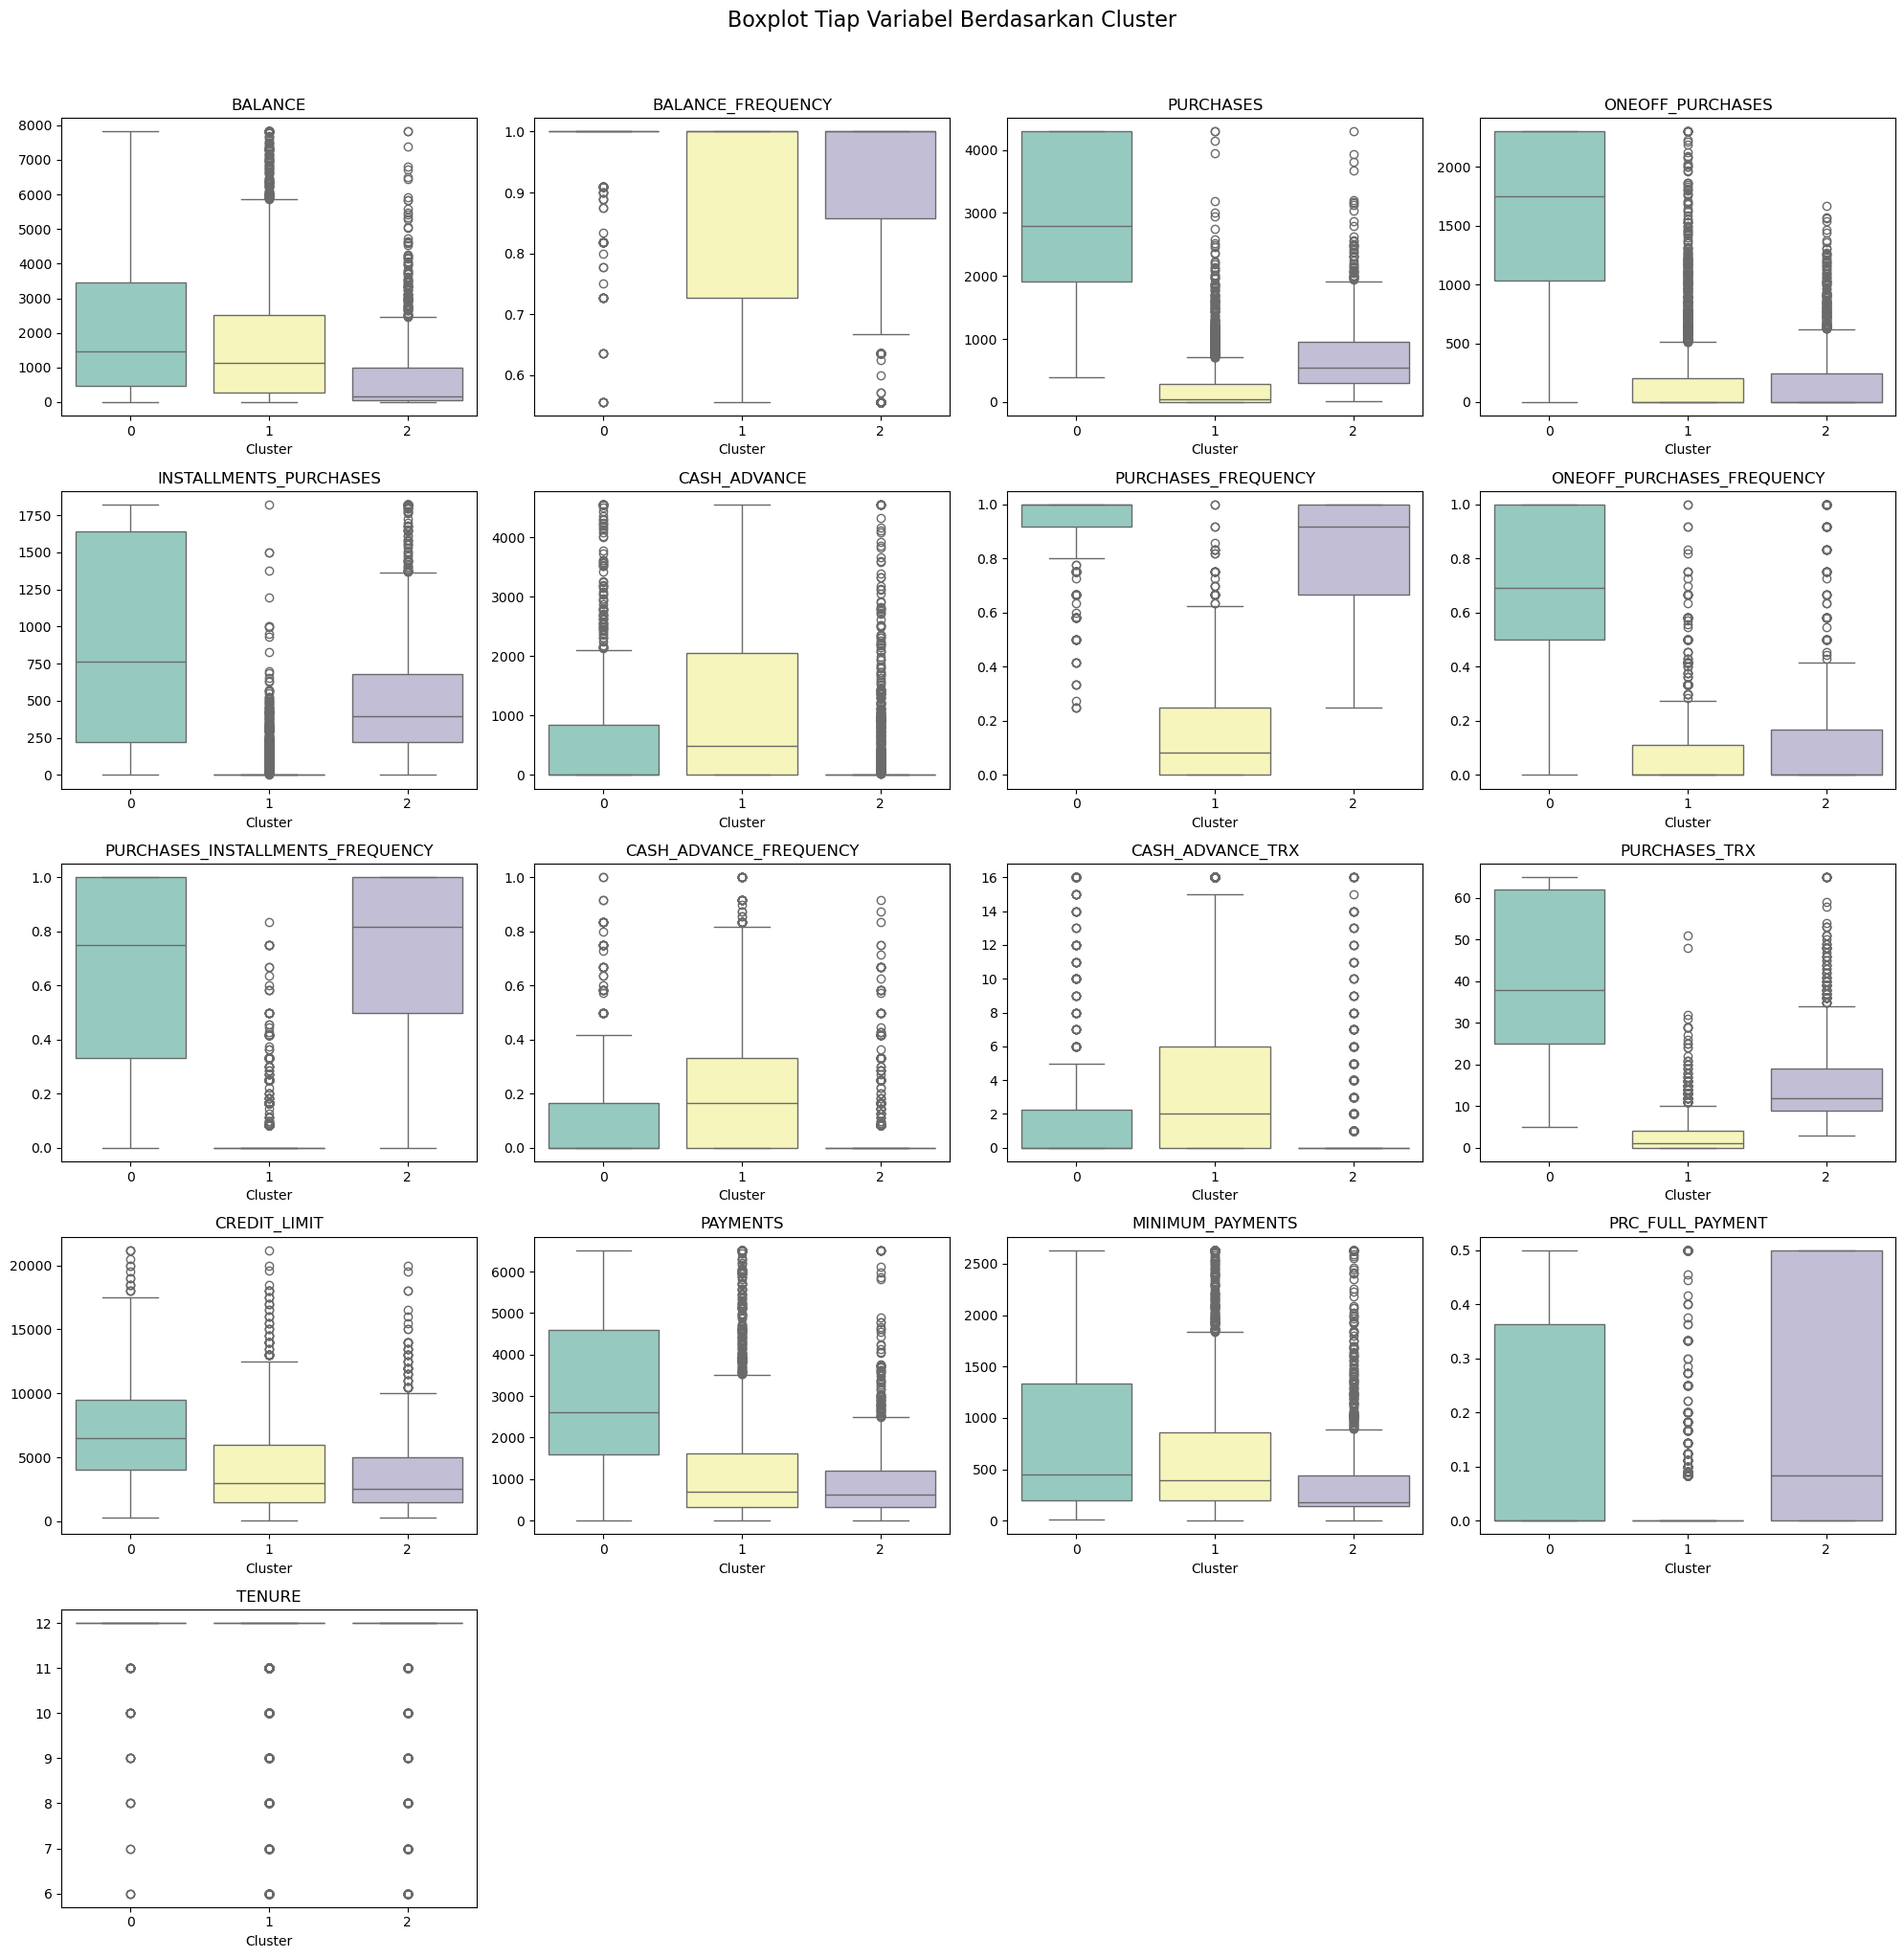

In [44]:
# Daftar kolom numerik (semua kolom kecuali 'Cluster')
kolom_numerik = dataset_capped.columns[:-1]

# Tentukan jumlah kolom dan baris subplot
n_cols = 4
n_rows = (len(kolom_numerik) + n_cols - 1) // n_cols

# Ukuran figure secara keseluruhan
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Buat subplot untuk tiap kolom
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=dataset_capped, x='Cluster', y=kolom, hue='Cluster', palette='Set3', legend=False)
    plt.title(f'{kolom}')
    plt.xlabel('Cluster')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Boxplot Tiap Variabel Berdasarkan Cluster', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Gambar tersebut menunjukkan boxplot untuk masing-masing variabel dalam dataset yang dikelompokkan berdasarkan hasil klastering (Cluster 0, 1, dan 2). Setiap boxplot memperlihatkan sebaran nilai asli tiap variabel untuk masing-masing klaster, sehingga dapat membandingkan perilaku antar kelompok nasabah berdasarkan karakteristik numerik yang sama.

Terlihat bahwa Cluster 0 secara menunjukkan nilai tertinggi dibanding cluster yang lain untuk variabel seperti BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_TRX, dan CREDIT_LIMIT. Hal ini menunjukkan bahwa nasabah di klaster ini sangat aktif dalam penggunaan kartu untuk belanja, baik secara sekali bayar maupun cicilan, dengan saldo dan batas kredit tinggi. Mereka tidak menggunakan CASH_ADVANCE (0), tetapi tetap memiliki nilai PAYMENTS yang tinggi, menggambarkan perilaku pembayaran aktif meskipun nilai PRC_FULL_PAYMENT mereka tetap 0, yang berarti tagihan tidak dilunasi secara penuh.

Sebaliknya, Cluster 1 tampak sangat rendah dibanding cluster yang lain dalam aktivitas pembelian—baik jumlah pembelian maupun frekuensi—namun justru memiliki nilai tertinggi  dibanding cluster yang lain pada CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, dan CASH_ADVANCE_TRX, menandakan bahwa klaster ini dominan menggunakan kartu untuk penarikan tunai ketimbang belanja. Nilai PURCHASES dan turunannya hampir nol, menggambarkan minimnya aktivitas konsumtif. Pembayaran mereka (baik total maupun minimum) berada di level menengah atau urutan ke dua dibanding yang lain, tapi tidak pernah melunasi tagihan secara penuh (PRC_FULL_PAYMENT = 0).

Sementara itu, Cluster 2 menunjukkan pola bahwa mereka memiliki saldo dan batas kredit paling rendah dibanding cluster yang lain, namun masih aktif melakukan pembelian, terutama melalui cicilan (INSTALLMENTS_PURCHASES). Mereka sama sekali tidak melakukan pembelian secara one-off dan juga tidak menarik uang tunai (cash advance = 0). Meskipun pembayaran total mereka rendah dibanding cluster yang lain, klaster ini merupakan satu-satunya yang menunjukkan kecenderungan untuk melunasi tagihan secara penuh (PRC_FULL_PAYMENT tertinggi dibanding yang lain), yang mencerminkan perilaku finansial yang relatif bijak walau dengan kapasitas keuangan terbatas.

Secara keseluruhan, gambar ini menggambarkan segmentasi yang cukup jelas antara nasabah aktif belanja (Cluster 0), nasabah penarik tunai pasif (Cluster 1), dan nasabah pengguna cicilan yang stabil (Cluster 2), dengan ciri khas unik pada masing-masing kelompok.

Selanjutnya membuat visualisas scatter plot untuk melihat cluster

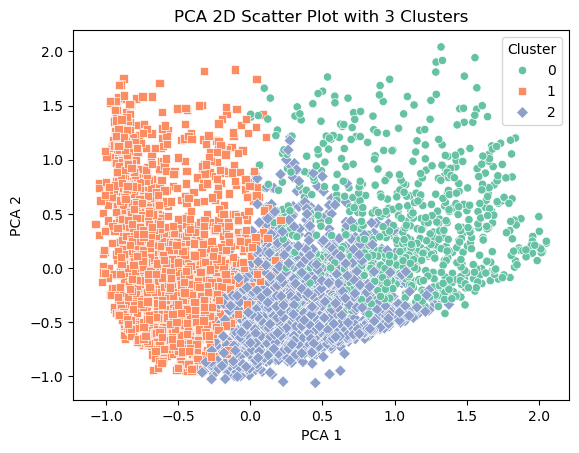

In [45]:
# Visualisasi 2D dengan PCA untuk melihat klaster
pca_2d = PCA(n_components=2)
dataset_scaled_pca_2d = pca_2d.fit_transform(dataset_scaled)

# Membuat scatter plot dengan 3 klaster
sns.scatterplot(x=dataset_scaled_pca_2d[:, 0], y=dataset_scaled_pca_2d[:, 1], hue=dataset_capped['Cluster'], 
                palette='Set2', style=dataset_capped['Cluster'], markers=["o", "s", "D"])

# Menambahkan title dan label sumbu
plt.title("PCA 2D Scatter Plot with 3 Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Menampilkan plot
plt.show()


Gambar tersebuh menunjukkan bahwa secara umum hasil klaster cukup baik secara visual. Cluster 1 terlihat terpisah, sedangkan Cluster 0 dan 2 agak tumpang tindih, yang juga mencerminkan kemungkinan karakteristik perilaku yang mirip sebagian antar nasabah dalam dua klaster tersebut. 

Selanjutnya menyimpan model, scaler, dan PCA

# BAB 10 - Model Saving

In [46]:
# Simpan scaler
with open('scaler.pkl', 'wb') as f1:
    pickle.dump(scaler, f1)

# Simpan PCA
with open('pca.pkl', 'wb') as f2:
    pickle.dump(pca, f2)

# Simpan model KMeans
with open('kmeans_model.pkl', 'wb') as f3:
    pickle.dump(km, f3)

# BAB 11 - Model Inference

Untuk model inference dibuat di notebook berbeda yaitu P1G6_Set_1_bagas_distyo_inf.ipynb dengan membuat data baru. Jadi sebelum itu saya mengecek apakah data baru ini ada pada dataset atau tidak.

In [47]:
# Membuat data baru untuk diuji (format sama dengan data yang digunakan untuk pelatihan)
data_baru = pd.DataFrame({
    'BALANCE': [2000.0, 1000.0, 1200.0],
    'BALANCE_FREQUENCY': [1.0, 0.5, 0.8],
    'PURCHASES': [3000.0, 500.0, 800.0],
    'ONEOFF_PURCHASES': [1500.0, 100.0, 200.0],
    'INSTALLMENTS_PURCHASES': [1000.0, 50.0, 300.0],
    'CASH_ADVANCE': [0.0, 200.0, 0.0],
    'PURCHASES_FREQUENCY': [0.7, 0.2, 0.5],
    'ONEOFF_PURCHASES_FREQUENCY': [0.5, 0.1, 0.3],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [0.6, 0.2, 0.4],
    'CASH_ADVANCE_FREQUENCY': [0.0, 0.1, 0.0],
    'CASH_ADVANCE_TRX': [0.0, 5.0, 0.0],
    'PURCHASES_TRX': [25.0, 5.0, 10.0],
    'CREDIT_LIMIT': [10000.0, 5000.0, 7000.0],
    'PAYMENTS': [2000.0, 500.0, 800.0],
    'MINIMUM_PAYMENTS': [1000.0, 300.0, 500.0],
    'PRC_FULL_PAYMENT': [0.0, 0.0, 0.0],
    'TENURE': [12.0, 12.0, 12.0]
})

# Tampilkan data baru
data_baru

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   2000.0                1.0     3000.0            1500.0   
1   1000.0                0.5      500.0             100.0   
2   1200.0                0.8      800.0             200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  1000.0           0.0                  0.7   
1                    50.0         200.0                  0.2   
2                   300.0           0.0                  0.5   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.5                               0.6   
1                         0.1                               0.2   
2                         0.3                               0.4   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0           25.0       10000.0   
1                     0.1               5.0            5.0        5000.0   
2                     0.0               0.0           10.0        7000.0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    2000.0            1000.0               0.0    12.0  
1     500.0             300.0               0.0    12.0  
2     800.0             500.0               0.0    12.0

In [50]:
# Ambil hanya kolom fitur (tanpa 'Cluster')
fitur_dataset = dataset_capped.drop(columns='Cluster').columns

# Samakan urutan kolom
data_baru = data_baru[fitur_dataset]
# Cek apakah setiap baris di data_baru sudah ada di dataset_capped (tanpa kolom 'Cluster')
matches = data_baru.apply(lambda row: ((dataset_capped.drop(columns='Cluster') == row).all(axis=1)).any(), axis=1)

# Tampilkan hasil
print(matches)


0    False
1    False
2    False
dtype: bool


Ketiga data tersebut tidak ada di dalam dataset, selanjutnya inference di notebook yang berbeda.

# BAB 12 - Conclusion

- Berdasarkan hasil EDA sebelum clustering, hasil analisis menunjukkan bahwa tenure memiliki hubungan positif namun lemah terhadap purchases, balance, dan payments, dengan tren kenaikan yang signifikan pada nasabah dengan masa penggunaan di atas 10 bulan. Hal ini dapat memberikan peluang bagi bank untuk menerapkan program loyalitas atau peningkatan limit bagi nasabah setia yang aktif. Sementara itu, credit limit tidak memiliki hubungan kuat dengan purchase frequency, yang berarti tingginya limit tidak menjamin nasabah akan lebih sering bertransaksi. Oleh karena itu, strategi yang lebih efektif adalah menerapkan pendekatan berbasis perilaku, seperti memberikan reward kepada nasabah aktif dan promosi eksklusif untuk mengaktivasi nasabah pasif.

- Dalam proses reduksi dimensi menggunakan PCA, diperoleh bahwa 10 komponen utama sudah cukup untuk mempertahankan sekitar 95% informasi dari data asli. Ini menunjukkan bahwa sebagian besar variasi dalam data dapat dijelaskan tanpa menggunakan seluruh fitur, sehingga proses analisis menjadi lebih efisien dan komputasi lebih ringan. Untuk menentukan jumlah klaster optimal, digunakan dua pendekatan: Elbow Method dan Silhouette Analysis. Elbow Method mengindikasikan jumlah klaster optimal adalah 4, karena penurunan WCSS mulai melambat signifikan setelah titik tersebut. Namun, Silhouette Analysis menunjukkan bahwa 3 klaster memberikan nilai siluet rata-rata tertinggi, dengan dua klaster terbentuk dengan baik dan satu klaster sedikit tumpang tindih. Dengan mempertimbangkan kualitas pemisahan antar klaster dan interpretasi yang lebih jelas, jumlah klaster 3 dipilih sebagai pilihan akhir yang paling sesuai untuk analisis ini.

- Hasil clustering membagi nasabah ke dalam tiga kelompok berdasarkan perilaku penggunaan kartu kredit, dengan perbandingan terhadap median masing-masing klaster. Cluster 0, "Nasabah Aktif Belanja", terdiri dari nasabah dengan saldo (BALANCE) dan batas kredit (CREDIT_LIMIT) tinggi jika dibandingkan dengan rata-rata klaster lainnya, serta sangat aktif berbelanja baik dalam bentuk sekali bayar maupun cicilan, meski tidak melunasi tagihan penuh. Cluster 1, "Nasabah Minim Transaksi, Cenderung Tarik Tunai", memiliki saldo dan batas kredit menengah dibandingkan klaster lain, namun sangat sedikit berbelanja dan lebih sering menggunakan fitur tarik tunai, dengan perilaku pembayaran yang rendah dibanding klaster lain. Cluster 2, "Nasabah Pengguna Cicilan yang Stabil", terdiri dari nasabah dengan saldo dan batas kredit rendah dibandingkan klaster lain, yang cenderung menggunakan kartu untuk cicilan dan memiliki frekuensi transaksi yang sedang dibanding klaster yang lain, dengan pembayaran yang lebih rendah dibanding klaster yang lain dan kecenderungan untuk melunasi tagihan penuh lebih tinggi dibandingkan dengan klaster lainnya.

- Untuk setiap klaster, berikut adalah rekomendasi bisnis yang sesuai. Cluster 0, "Nasabah Aktif Belanja", disarankan untuk ditawarkan program reward, cashback, atau promo belanja, serta dorongan untuk melunasi tagihan penuh dengan insentif agar lebih loyal dan sehat secara finansial. Cluster 1, "Nasabah Minim Transaksi, Cenderung Tarik Tunai", sebaiknya diberikan insentif untuk pembelanjaan seperti diskon atau cashback, sambil diberikan edukasi tentang risiko cash advance dan pemantauan ketat terhadap pola pembayaran mereka. Sementara itu, Cluster 2, "Nasabah Pengguna Cicilan yang Stabil", dapat diberikan kenaikan limit bertahap, program cicilan bunga rendah, dan fitur pengingat pembayaran untuk menjaga kenyamanan dan keteraturan penggunaan kartu kredit mereka.

- Berdasarkan EDA setelah clustering, Visualisasi PCA 2D menunjukkan bahwa hasil klasterisasi cukup baik secara visual. Cluster 1 terlihat paling terpisah, sementara Cluster 0 dan Cluster 2 menunjukkan sedikit tumpang tindih, yang mengindikasikan adanya kesamaan karakteristik perilaku antara sebagian nasabah di kedua klaster tersebut.

- Kelebihan : Model clustering yang digunakan memiliki kelebihan dalam menyederhanakan data melalui PCA, dapat melakukan analisis lebih efisien tanpa kehilangan banyak informasi penting. Selain itu, pembagian nasabah menjadi tiga klaster berdasarkan perilaku penggunaan kartu kredit memberikan insight yang berguna untuk strategi pemasaran yang lebih tepat sasaran.

- Kekurangan : Terdapat kelemahan terkait dengan tumpang tindih antara Cluster 0 dan Cluster 2, yang dapat menyebabkan kesulitan dalam menargetkan cluster dengan tepat. 

- Untuk improvement selanjutnya dari model clustering yang dibuat, beberapa langkah yang dapat dipertimbangkan adalah: Menggunakan algoritma clustering lain seperti DBSCAN untuk mengatasi masalah tumpang tindih antar klaster yang ada, serta mempertimbangkan penggunaan jumlah klaster 4, berdasarkan hasil dari Elbow Method yang menunjukkan penurunan WCSS yang signifikan pada titik tersebut.
